In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.0004918457703064434, 0.00047652681129406915, 0.0005012606555598792, 0.0003818694368099861, 0.0005477638305228858, 0.0004946283653619386, 0.0005928433148593851, 0.0009132475851966421, 0.0007739739732427034, 0.0004825569468069985]
    Error u of fuhe active learning(LHS sampling): 5.656517e-04
    [0.00015397783070231113, 0.0001454873810307916, 0.0001548726465310479, 0.00012626243115483474, 0.00019635635649588497, 0.00015449652540876614, 0.0001842174007906868, 0.0002456482515296615, 0.0002340281849460364, 0.00014943499300139977]
    MAE of fuhe active learning(LHS sampling): 1.744782e-04
    [5.02034790357667e-08, 4.692699759238895e-08, 5.196422300360493e-08, 3.6634415860281316e-08, 8.172389465962264e-08, 5.070185177060105e-08, 7.304977403304386e-08, 1.6983871256676875e-07, 1.2104198107510296e-07, 4.820312678060034e-08]
    MSE of fuhe active learning(LHS sampling): 7.302885e-08
    [0.00015304271, 0.0015350054, 8.762271e-05, 3.9917533e-05, 0.000530291, 7.579352e-05, 8.895196e-05, 0.00013733155, 0.00020986705, 0.009149307]
    Chaos of fuhe active learning(LHS sampling): 1.200713e-03
    [4.4392527e-07, 4.6064906e-07, 4.361376e-07, 4.7483502e-07, 4.446665e-07, 4.305923e-07, 4.1993644e-07, 4.9815367e-07, 4.890644e-07, 3.6887923e-07]
    Residual of fuhe active learning(LHS sampling): 4.466840e-07
    """,
    'Xianxing': """
    [0.00040544122076598447, 0.0004316564107811849, 0.00047848026656286085, 0.0004881972206582, 0.000261569379802745, 0.0002961770576320881, 0.0006622679400588815, 0.0004649011447787378, 0.000546124129502492, 0.0004903212341537711]
    Error u of fuhe active learning(LHS sampling): 4.525136e-04
    [0.00012815842466992893, 0.00013308757862589155, 0.00014891560207612047, 0.00015143549293169774, 9.134510216023825e-05, 0.00011564199864376177, 0.0002049880725818106, 0.00014231077883076462, 0.00016731465261219842, 0.00015251667525606835]
    MAE of fuhe active learning(LHS sampling): 1.435714e-04
    [3.5149057388716755e-08, 3.8982447104249e-08, 4.7484307671771956e-08, 4.936517596175008e-08, 1.6979228956103354e-08, 2.6621524776512308e-08, 9.134920023338118e-08, 4.474192892706784e-08, 6.106671719925793e-08, 4.9794138011410646e-08]
    MSE of fuhe active learning(LHS sampling): 4.615337e-08
    [8.855213e-05, 0.011694194, 9.127863e-05, 4.501021e-05, 0.001503286, 8.941901e-05, 9.255649e-05, 0.00015005862, 0.00018036098, 0.003957932]
    Chaos of fuhe active learning(LHS sampling): 1.789265e-03
    [5.962395e-07, 6.335779e-07, 4.5188403e-07, 4.5726847e-07, 4.167175e-07, 4.234828e-07, 4.263136e-07, 4.4940475e-07, 4.790254e-07, 4.671756e-07]
    Residual of fuhe active learning(LHS sampling): 4.801090e-07
    """,
    'Active': """
    [0.0005554339608559225, 0.0004906510957650293, 0.0004665685982288446, 0.0005181701206443832, 0.0019774223264008386, 0.0005061674378162917, 0.0005259810346627851, 0.3425491908078741, 0.0007248379140604068, 0.0006253204139293384]
    Error u of fuhe active learning(LHS sampling): 3.489397e-02
    [0.00018516130868928007, 0.00015239831731062625, 0.00014283152582780407, 0.00016390754795242608, 0.0005215132734166209, 0.00016036564347222663, 0.00017179250399467942, 0.07688654768698683, 0.00025618642599234404, 0.0002191694478042031]
    MAE of fuhe active learning(LHS sampling): 7.885987e-03
    [6.588629203382683e-08, 4.983859216945594e-08, 4.544956632807816e-08, 5.5827687329648876e-08, 7.772103421774413e-07, 5.354005337717293e-08, 5.871059239147882e-08, 0.02397774313168036, 1.2040161291692695e-07, 8.790442589443165e-08]
    MSE of fuhe active learning(LHS sampling): 2.397906e-03
    [0.0576123, 0.00014910809, 9.478479e-05, 7.30025e-05, 0.00012834524, 8.8688335e-05, 7.884619e-05, 3.328626e-06, 0.0059098727, 0.0034214007]
    Chaos of fuhe active learning(LHS sampling): 6.755968e-03
    [4.1639214e-07, 4.883402e-07, 4.72897e-07, 4.6490095e-07, 5.500742e-07, 4.6015225e-07, 5.2067844e-07, 9.125596e-07, 4.2798774e-07, 4.987462e-07]
    Residual of fuhe active learning(LHS sampling): 5.212729e-07
    """,
    'Residual': """
    [0.0004388316277854738, 0.0004516425036080554, 0.0004909684909272208, 0.0004499848179256069, 0.0009273143381470267, 0.0005022326877530732, 0.0004747893294826137, 0.0004907480713503563, 0.000503456846600242, 0.6412601608789799]
    Error u of fuhe active learning(LHS sampling): 6.459901e-02
    [0.00013466048655549618, 0.00013774013160500353, 0.00014855616332055393, 0.00013839193712877486, 0.00028004969048753275, 0.0001510724688482137, 0.0001452714425514351, 0.00014857218467576657, 0.0001520704178371895, 0.1582632412863403]
    MAE of fuhe active learning(LHS sampling): 1.596996e-02
    [4.0661568759470776e-08, 4.259159818610274e-08, 5.0772769573972464e-08, 4.2571266351709874e-08, 1.7989833118891455e-07, 5.204902642176019e-08, 4.7284867983491434e-08, 4.937375046094986e-08, 5.234705484498265e-08, 0.08286103053311286]
    MSE of fuhe active learning(LHS sampling): 8.286159e-03
    [0.0049398914, 0.0071390835, 0.00014965539, 4.66547, 1.098932, 0.00012691357, 8.9322144e-05, 1.7970233e-05, 0.0045942524, 15.120174]
    Chaos of fuhe active learning(LHS sampling): 2.090163e+00
    [4.784065e-07, 5.537331e-07, 4.3092746e-07, 5.106276e-07, 4.6684931e-07, 4.8295533e-07, 4.5237516e-07, 5.0499045e-07, 4.961496e-07, 1.8578302e-06]
    Residual of fuhe active learning(LHS sampling): 6.234845e-07
    """,
    'Fuhe': """
    [0.0004319994296747219, 0.00045468082278656415, 0.00036749237910102414, 0.0007784376826781728, 0.0004492039238711263, 0.000460709855199536, 0.00045765084536907144, 0.0004579324219571796, 0.00045542971241855295, 0.0004489792416703307]
    Error u of fuhe active learning(LHS sampling): 4.762516e-04
    [0.0001336601615275523, 0.0001380680750019315, 0.00012878552805109734, 0.00022116900673120574, 0.0001361439662564822, 0.0001392754719015238, 0.00013870895986010424, 0.0001379449299536692, 0.00013902941538585133, 0.00013717707113109675]
    MAE of fuhe active learning(LHS sampling): 1.449963e-04
    [3.9668945558545624e-08, 4.297578038774424e-08, 3.33836528341637e-08, 1.2646705786824478e-07, 4.215393323767161e-08, 4.434145831712974e-08, 4.3970947069053286e-08, 4.3828277323286694e-08, 4.3431024751290604e-08, 4.2346097601142024e-08]
    MSE of fuhe active learning(LHS sampling): 5.025672e-08
    [0.008642179, 0.004750698, 8.0090875e-05, 5.3138596e-05, 0.0011420732, 0.00012658458, 7.157041e-05, 0.0028248439, 0.000112602385, 18.243076]
    Chaos of fuhe active learning(LHS sampling): 1.826088e+00
    [4.834194e-07, 4.815568e-07, 4.4027956e-07, 4.3197633e-07, 4.5162233e-07, 4.5754405e-07, 4.6322862e-07, 4.867235e-07, 4.5407387e-07, 4.3853015e-07]
    Residual of fuhe active learning(LHS sampling): 4.588955e-07
    """,
    'Chaos': """
    [0.00044775684534546496, 0.0013465244821014638, 0.002040901528510869, 0.46830473504518727, 0.00030510786230697614, 0.0005015450796470337, 0.0008366454717344251, 0.00047675454210403665, 0.000667632669485664, 0.0009728427241419485]
    Error u of fuhe active learning(LHS sampling): 4.759004e-02
    [0.00014856130035976355, 0.00039668505686777533, 0.0005268129517619057, 0.11575962516168138, 0.00012155197681709949, 0.00015714437722860175, 0.00029184885141798276, 0.00014397341902794368, 0.00023408594813763568, 0.0002724964869399038]
    MAE of fuhe active learning(LHS sampling): 1.180528e-02
    [4.2944556210458236e-08, 3.7673510293249216e-07, 8.335849939161988e-07, 0.04407865801223586, 2.9044583306101153e-08, 5.2196364852879437e-08, 1.5970356321671474e-07, 4.722514324456461e-08, 1.001811038120511e-07, 1.9996389722607323e-07]
    MSE of fuhe active learning(LHS sampling): 4.408050e-03
    [0.006728628, 0.009671487, 0.00017409914, 0.089235455, 0.0053537856, 8.433208e-05, 0.0001105429, 0.023071596, 0.0001961356, 0.00044752314]
    Chaos of fuhe active learning(LHS sampling): 1.350736e-02
    [4.9879054e-07, 4.4812714e-07, 4.795629e-07, 1.4178132e-06, 4.782946e-07, 5.0172775e-07, 4.0675218e-07, 4.4661897e-07, 4.5126467e-07, 4.4587557e-07]
    Residual of fuhe active learning(LHS sampling): 5.574828e-07
    """,
    '0.9Residual': """
    [0.0004481850302001684, 0.0004146950018881605, 0.0004960675116553978, 0.00045278913660481556, 0.00045092852491221045, 0.0004129053832536286, 0.0004540901049072598, 0.0005131716279776311, 0.00047882622021955365, 0.40616223553898895]
    Error u of fuhe active learning(LHS sampling): 4.102839e-02
    [0.00013635545460903757, 0.0001285424572155964, 0.0001488264334566101, 0.0001406396471499675, 0.0001369161025266589, 0.00012864186261567724, 0.00013979904349165407, 0.00015420920004619265, 0.00014417523089357514, 0.10456242442887156]
    MAE of fuhe active learning(LHS sampling): 1.058205e-02
    [4.2258257590242514e-08, 3.6545613202867065e-08, 5.134192854844752e-08, 4.33529581049235e-08, 4.243190714794155e-08, 3.691559750647881e-08, 4.344904280005271e-08, 5.446059366798134e-08, 4.7891010756995745e-08, 0.033734832272190124]
    MSE of fuhe active learning(LHS sampling): 3.373523e-03
    [0.005327477, 0.004244929, 0.0001399676, 0.1984022, 0.0001627829, 0.00012056661, 9.838217e-05, 1.1009458e-05, 0.0029939068, 0.00078555313]
    Chaos of fuhe active learning(LHS sampling): 2.122868e-02
    [5.2345445e-07, 4.6342643e-07, 4.2669194e-07, 5.093473e-07, 4.2887086e-07, 4.252954e-07, 4.2123725e-07, 4.4585124e-07, 4.980502e-07, 6.777118e-07]
    Residual of fuhe active learning(LHS sampling): 4.819937e-07
    """,
    '0.8Residual': """
    [0.00044033314880244644, 0.00045903074058145735, 0.0006387084548076398, 0.00047433349295575495, 0.00044694532172329945, 0.0004633475387174799, 0.0004573828272828165, 0.00047951091203536, 0.0005036662863844496, 0.0005193538702195712]
    Error u of fuhe active learning(LHS sampling): 4.882613e-04
    [0.00013636600219054016, 0.00014065129860333405, 0.00019321532022835344, 0.000145442572517831, 0.00013521633936977096, 0.00014044701392473824, 0.00013947531139209837, 0.00014565097539107535, 0.00015112568674647086, 0.00015794960904446027]
    MAE of fuhe active learning(LHS sampling): 1.485540e-04
    [4.108120855000637e-08, 4.381948270935862e-08, 8.42390001564641e-08, 4.683376519125927e-08, 4.197941672267708e-08, 4.497769390463633e-08, 4.388024366641424e-08, 4.753143209406734e-08, 5.2476899339858045e-08, 5.631972096615343e-08]
    MSE of fuhe active learning(LHS sampling): 5.031389e-08
    [0.005102197, 0.0071586207, 0.00016002031, 0.8899947, 0.00013107658, 0.00013279193, 9.0317364e-05, 8.720119e-06, 0.0030282955, 9.142789e-05]
    Chaos of fuhe active learning(LHS sampling): 9.058981e-02
    [4.652311e-07, 4.4877595e-07, 4.8368565e-07, 4.4356102e-07, 4.6505954e-07, 3.861544e-07, 5.05363e-07, 4.837141e-07, 5.1234906e-07, 4.9183495e-07]
    Residual of fuhe active learning(LHS sampling): 4.685729e-07
    """,
    '0.7Residual': """
    [0.00045923055417779895, 0.0003805195898261856, 0.00046599589898333463, 0.00046747487026509404, 0.00045403084568467524, 0.0004705600674900421, 0.0004604943863655175, 0.00046439912000889746, 0.00046725411369758375, 0.0005324882468577318]
    Error u of fuhe active learning(LHS sampling): 4.622448e-04
    [0.00014025014785666178, 0.00012330366198635658, 0.0001406931332183354, 0.00014315082258136954, 0.00013857859174272303, 0.0001420651370555427, 0.00014100246765852255, 0.00014000688516935478, 0.00014145210762449018, 0.0001625927164581426]
    MAE of fuhe active learning(LHS sampling): 1.413096e-04
    [4.423519388343329e-08, 3.28702686893946e-08, 4.540074511476649e-08, 4.558819972743756e-08, 4.2605986612842545e-08, 4.6204191755255835e-08, 4.4642112865802436e-08, 4.492584896773996e-08, 4.5614551216907014e-08, 5.905083640115016e-08]
    MSE of fuhe active learning(LHS sampling): 4.511379e-08
    [0.0083980495, 0.004980512, 0.00014981862, 0.08522135, 0.004440362, 0.00011760158, 9.8106364e-05, 4.529953e-06, 0.0039979485, 0.00010213685]
    Chaos of fuhe active learning(LHS sampling): 1.075104e-02
    [4.3858063e-07, 4.9004484e-07, 4.866275e-07, 4.77517e-07, 4.2084434e-07, 3.9956672e-07, 4.9082746e-07, 4.5736613e-07, 4.4355988e-07, 4.217593e-07]
    Residual of fuhe active learning(LHS sampling): 4.526694e-07
    """,
    '0.6Residual': """
    [0.00042804895034136316, 0.00043836714051394575, 0.0004517598774652929, 0.0004606184570832019, 0.0007787459617002917, 0.0004881932752423839, 0.00045842942779228873, 0.0004734121719249861, 0.00045825854867051106, 0.0004518982899952313]
    Error u of fuhe active learning(LHS sampling): 4.887732e-04
    [0.00013628279733653953, 0.00013267303810398932, 0.00013813141034396605, 0.00014471441385339271, 0.0002238483442432778, 0.0001473713657237207, 0.0001397402987557446, 0.00014428243364056885, 0.00013928280825873315, 0.00014012673893241227]
    MAE of fuhe active learning(LHS sampling): 1.486454e-04
    [3.9337632619037916e-08, 4.016225630691893e-08, 4.310116241258804e-08, 4.4427027627240256e-08, 1.2745388174334242e-07, 4.959768608247224e-08, 4.4173033907964714e-08, 4.65690055438146e-08, 4.396297110417339e-08, 4.292766680281183e-08]
    MSE of fuhe active learning(LHS sampling): 5.217123e-08
    [0.007259813, 0.0059985695, 0.00017531606, 0.009422082, 0.0039510056, 0.00012648696, 0.000101060745, 4.053455e-05, 0.0021839428, 0.0039959596]
    Chaos of fuhe active learning(LHS sampling): 3.325477e-03
    [4.8378433e-07, 4.7109756e-07, 4.7725416e-07, 4.941694e-07, 4.828157e-07, 4.2413717e-07, 4.2379747e-07, 4.4313742e-07, 3.868447e-07, 4.903777e-07]
    Residual of fuhe active learning(LHS sampling): 4.577416e-07
    """,
    '0.4Residual': """
    [0.0005470682847400836, 0.0015360103379981492, 0.0004955259671739534, 0.000462744083537044, 0.00046641284095270773, 0.0004431740046775938, 0.0004664982505468486, 0.0004621089648226055, 0.00045502099592494965, 0.0004518366927347042]
    Error u of fuhe active learning(LHS sampling): 5.786400e-04
    [0.00017883851361983453, 0.00041118303587687035, 0.00015135997696058413, 0.00014607883354233344, 0.0001417612076015537, 0.0001346204193521946, 0.00014386810534736507, 0.00014354986975976196, 0.0001396347141988967, 0.00013950162222218227]
    MAE of fuhe active learning(LHS sampling): 1.730396e-04
    [6.273756364436129e-08, 4.7120918034404836e-07, 5.083873104649043e-08, 4.4794913743344144e-08, 4.545981924872583e-08, 4.121960048894852e-08, 4.663712783376049e-08, 4.479113819136511e-08, 4.369821810751309e-08, 4.276296126879881e-08]
    MSE of fuhe active learning(LHS sampling): 8.941493e-08
    [0.011121352, 0.0066190627, 0.0001986114, 0.034015268, 0.0016489715, 0.00013193188, 9.008245e-05, 0.07447911, 0.0018658477, 0.0036939078]
    Chaos of fuhe active learning(LHS sampling): 1.338641e-02
    [5.5789315e-07, 4.956644e-07, 4.3651994e-07, 4.491426e-07, 4.6075888e-07, 4.3642035e-07, 4.5202705e-07, 4.683552e-07, 4.4031412e-07, 5.3228496e-07]
    Residual of fuhe active learning(LHS sampling): 4.729381e-07
    """,
    '0.3Residual': """
    [0.0004523734538605247, 0.00045032159199355547, 0.0004716722024462947, 0.0006582087127901049, 0.00047821076571547255, 0.0004613429886161121, 0.0006314169365161759, 0.0010249996127729634, 0.0004623917388128569, 0.0004541005565188387]
    Error u of fuhe active learning(LHS sampling): 5.545039e-04
    [0.00014419178581656362, 0.00013628265838117886, 0.00016213229328520962, 0.00020485770425273555, 0.00014592775304012775, 0.0001387320828381431, 0.00019197426284733206, 0.0003087683606529892, 0.00014003831232153288, 0.00014240727827350433]
    MAE of fuhe active learning(LHS sampling): 1.715312e-04
    [4.3191656826282457e-08, 4.2425784715465804e-08, 5.5722170011646176e-08, 9.022059049522408e-08, 4.755247280852395e-08, 4.436132337372212e-08, 8.356254245852741e-08, 2.1305555429004065e-07, 4.459127771081288e-08, 4.3516558889014074e-08]
    MSE of fuhe active learning(LHS sampling): 7.081999e-08
    [0.007560974, 0.0084497295, 0.00045693188, 0.014898504, 5.273999, 0.0001352244, 9.3471914e-05, 0.02498553, 0.0022132061, 0.0001671169]
    Chaos of fuhe active learning(LHS sampling): 5.332960e-01
    [4.583926e-07, 4.0914983e-07, 4.1799785e-07, 4.868134e-07, 4.4910666e-07, 3.8411713e-07, 4.7710114e-07, 4.6610126e-07, 4.6738091e-07, 4.8088896e-07]
    Residual of fuhe active learning(LHS sampling): 4.497050e-07
    """,
    '0.2Residual': """
    [0.0005120846933561239, 0.0008330886145383339, 0.00037986587951980823, 0.0004575557458218991, 0.00045051764534539073, 0.00045982114218019927, 0.0004868421923899377, 0.0004592008607864952, 0.0005037713273463572, 0.001388033768796587]
    Error u of fuhe active learning(LHS sampling): 5.930782e-04
    [0.00015749086593917384, 0.0002505218897381128, 0.00012882880140966868, 0.0001435605191082996, 0.00013791913121810197, 0.0001393455040931015, 0.00014858090807152899, 0.00014030615161698514, 0.00015895182908548183, 0.0004050121112957368]
    MAE of fuhe active learning(LHS sampling): 1.810518e-04
    [5.4333141399947943e-08, 1.4556925415635788e-07, 3.3438649512489837e-08, 4.397695781582687e-08, 4.286581135505273e-08, 4.4053233045064835e-08, 4.958155338019081e-08, 4.3877623490042004e-08, 5.3202404428802984e-08, 4.0038438180020706e-07]
    MSE of fuhe active learning(LHS sampling): 9.112830e-08
    [0.0063215625, 0.010325428, 0.00021552284, 0.00023418496, 0.00011687762, 9.208445e-05, 8.46519e-05, 0.15290587, 0.0024992947, 0.00024434872]
    Chaos of fuhe active learning(LHS sampling): 1.730398e-02
    [4.4574062e-07, 4.6390676e-07, 4.804642e-07, 4.226672e-07, 4.627825e-07, 4.130709e-07, 4.5058732e-07, 4.3783552e-07, 4.2770796e-07, 4.6293974e-07]
    Residual of fuhe active learning(LHS sampling): 4.467703e-07
    """,
    '0.1Residual': """
    [0.0004647022584697867, 0.0004580980912167971, 0.0009462714664935335, 0.0003529198927649876, 0.002306216842074118, 0.0004589993287535919, 0.00029997478913367133, 0.0004649164644571087, 0.00045160016605052985, 0.0004614672658015532]
    Error u of fuhe active learning(LHS sampling): 6.665167e-04
    [0.00014266577498218253, 0.000137052202171367, 0.00028130952279649374, 0.00013987418129760224, 0.0006053058525206887, 0.00013889004101937807, 0.00012978357340200037, 0.0001405964178804617, 0.00013666651277753443, 0.00013979438972039988]
    MAE of fuhe active learning(LHS sampling): 1.991938e-04
    [4.486112106795405e-08, 4.3614452210769645e-08, 1.867997780154406e-07, 3.913059224706379e-08, 1.0639504160282583e-06, 4.387123970835664e-08, 3.292060772469953e-08, 4.486689162365184e-08, 4.264364917014079e-08, 4.4548400985650814e-08]
    MSE of fuhe active learning(LHS sampling): 1.587207e-07
    [0.00038232136, 0.0044518737, 0.00015819426, 60.12349, 0.00012965722, 7.890012e-05, 9.41707e-05, 0.032080878, 0.00017059875, 0.00015086634]
    Chaos of fuhe active learning(LHS sampling): 6.016119e+00
    [4.5472325e-07, 5.6272495e-07, 4.222669e-07, 4.5083107e-07, 4.5792444e-07, 4.3964383e-07, 4.3144973e-07, 4.7850517e-07, 4.974994e-07, 4.7902586e-07]
    Residual of fuhe active learning(LHS sampling): 4.674595e-07
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    chaos = re.findall(r'\[([^\]]+)\]', data)[3]
    residual = re.findall(r'\[([^\]]+)\]', data)[4]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    chaos = list(map(float, chaos.split(',')))
    residual = list(map(float, residual.split(',')))
    
    return error_u, mae, mse, chaos, residual

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse, chaos, residual = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

        data['Method'].append(method)
        data['Metric'].append('Chaos')
        data['Values'].append(chaos)

        data['Method'].append(method)
        data['Metric'].append('Residual')
        data['Values'].append(residual)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

         Method    Metric                                             Values
0          PINN   Error_u  [0.0004918457703064434, 0.00047652681129406915...
1          PINN       MAE  [0.00015397783070231113, 0.0001454873810307916...
2          PINN       MSE  [5.02034790357667e-08, 4.692699759238895e-08, ...
3          PINN     Chaos  [0.00015304271, 0.0015350054, 8.762271e-05, 3....
4          PINN  Residual  [4.4392527e-07, 4.6064906e-07, 4.361376e-07, 4...
..          ...       ...                                                ...
65  0.1Residual   Error_u  [0.0004647022584697867, 0.0004580980912167971,...
66  0.1Residual       MAE  [0.00014266577498218253, 0.000137052202171367,...
67  0.1Residual       MSE  [4.486112106795405e-08, 4.3614452210769645e-08...
68  0.1Residual     Chaos  [0.00038232136, 0.0044518737, 0.00015819426, 6...
69  0.1Residual  Residual  [4.5472325e-07, 5.6272495e-07, 4.222669e-07, 4...

[70 rows x 3 columns]


In [3]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Chaos', '0.9Residual', '0.8Residual', '0.7Residual', '0.6Residual', '0.4Residual', '0.3Residual', '0.2Residual', '0.1Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.0004918457703064434, 0.00047652681129406915, 0.0005012606555598792, 0.0003818694368099861, 0.0005477638305228858, 0.0004946283653619386, 0.0005928433148593851, 0.0009132475851966421, 0.0007739739732427034, 0.0004825569468069985], 'Xianxing': [0.00040544122076598447, 0.0004316564107811849, 0.00047848026656286085, 0.0004881972206582, 0.000261569379802745, 0.0002961770576320881, 0.0006622679400588815, 0.0004649011447787378, 0.000546124129502492, 0.0004903212341537711], 'Active': [0.0005554339608559225, 0.0004906510957650293, 0.0004665685982288446, 0.0005181701206443832, 0.0019774223264008386, 0.0005061674378162917, 0.0005259810346627851, 0.3425491908078741, 0.0007248379140604068, 0.0006253204139293384], 'Residual': [0.0004388316277854738, 0.000451642503608055

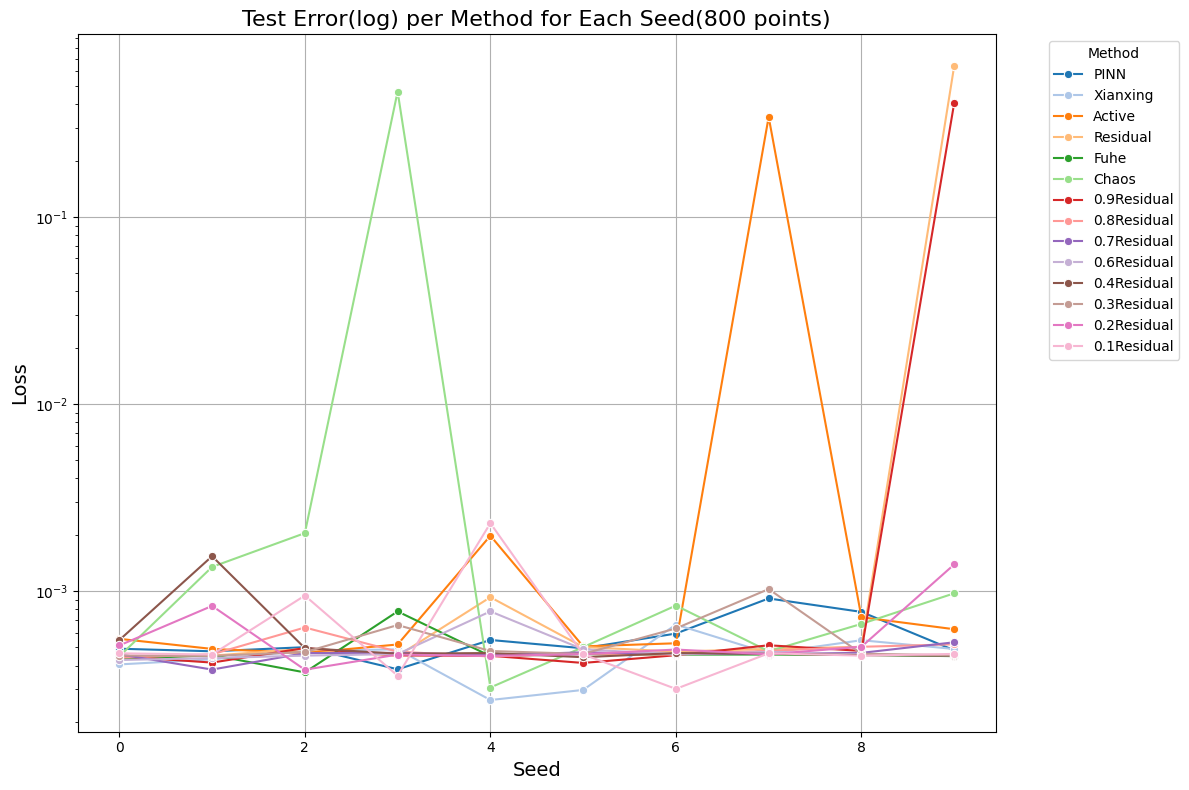

In [4]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

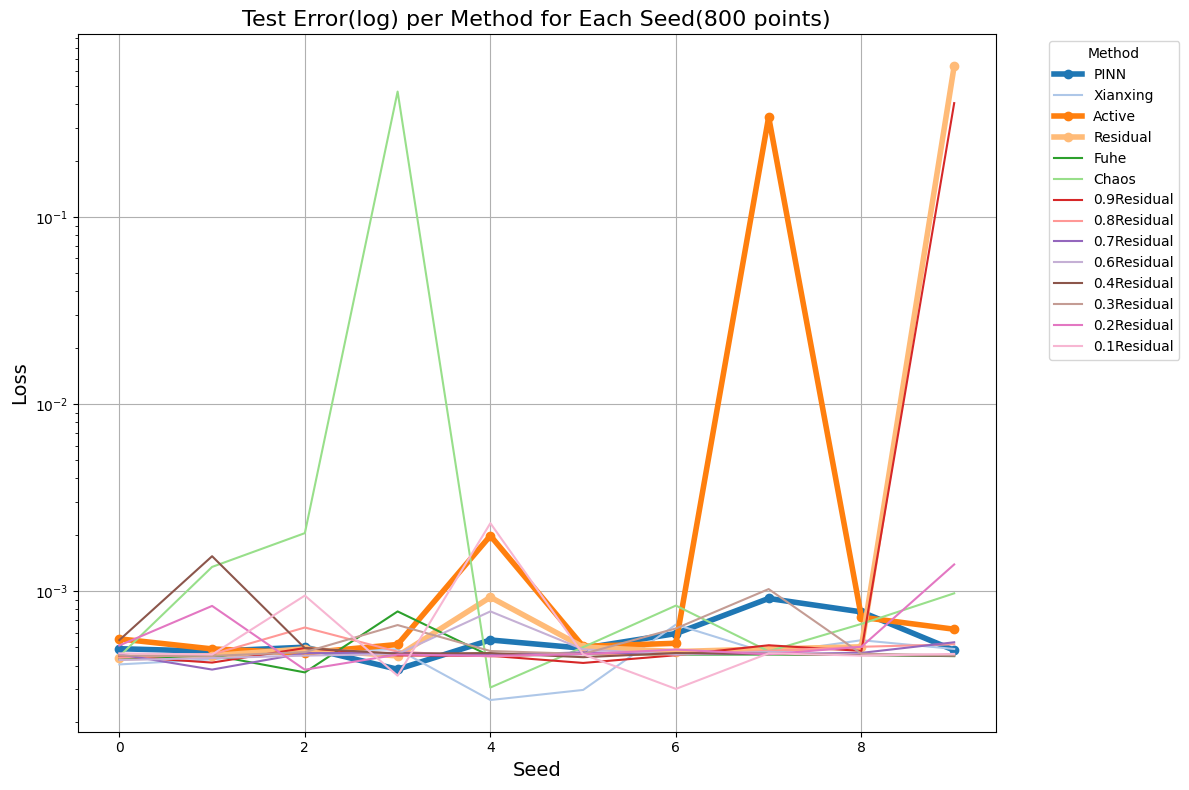

In [5]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\772891821.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\772891821.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


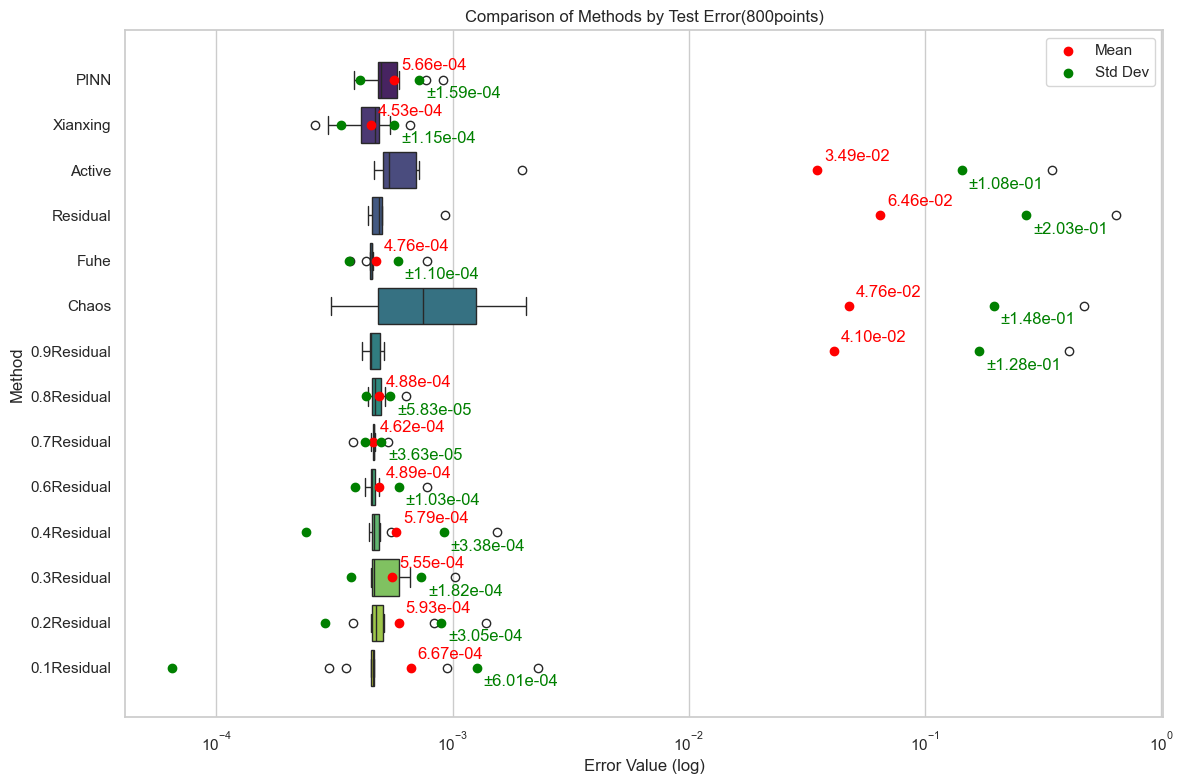

In [6]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [33]:
(5.66e-04-4.62e-04)/5.66e-04

0.18374558303886923

C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\2907399335.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\2907399335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


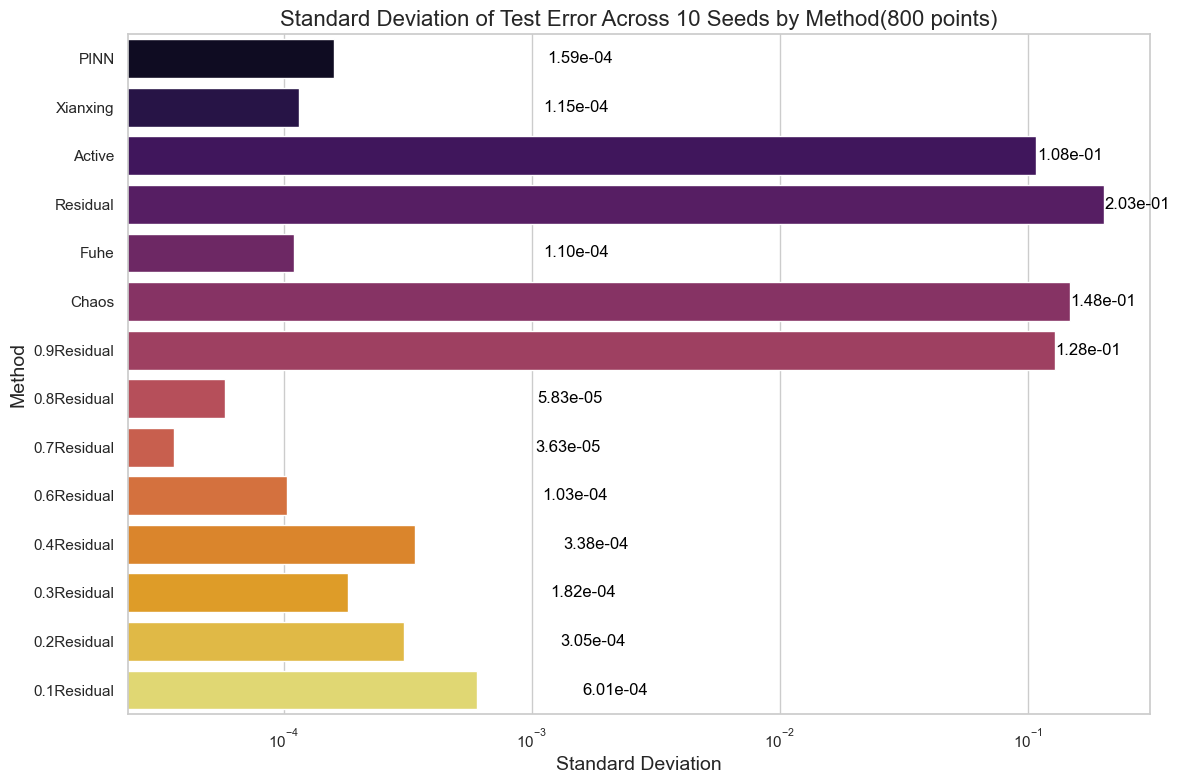

In [8]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

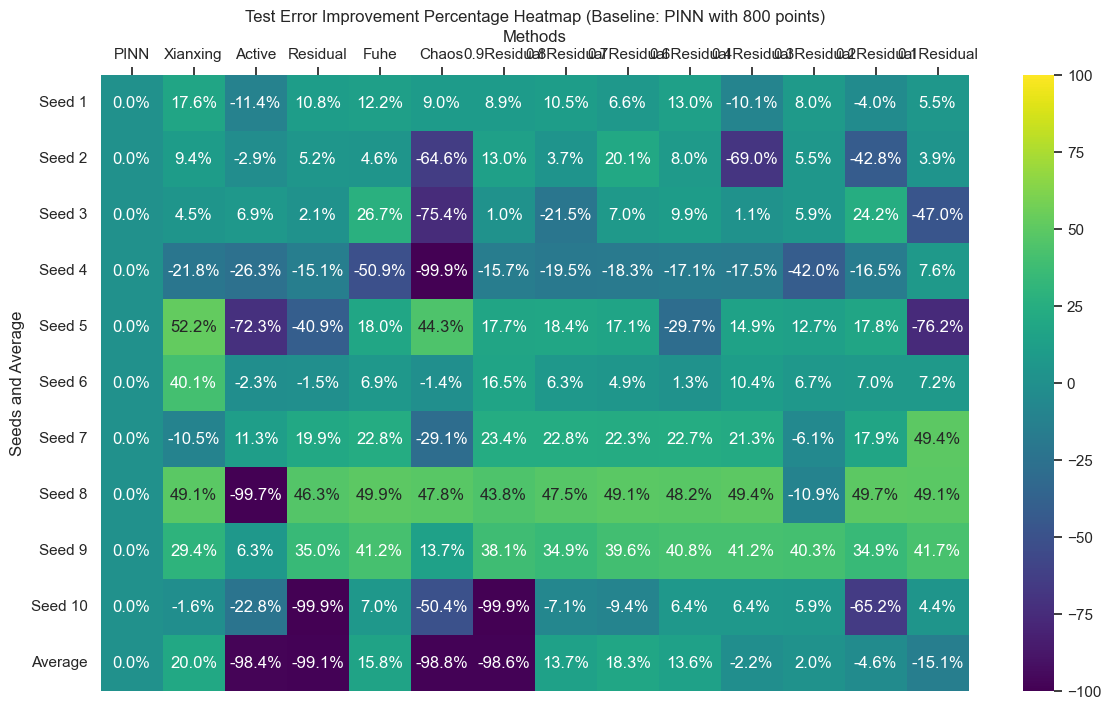

In [9]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



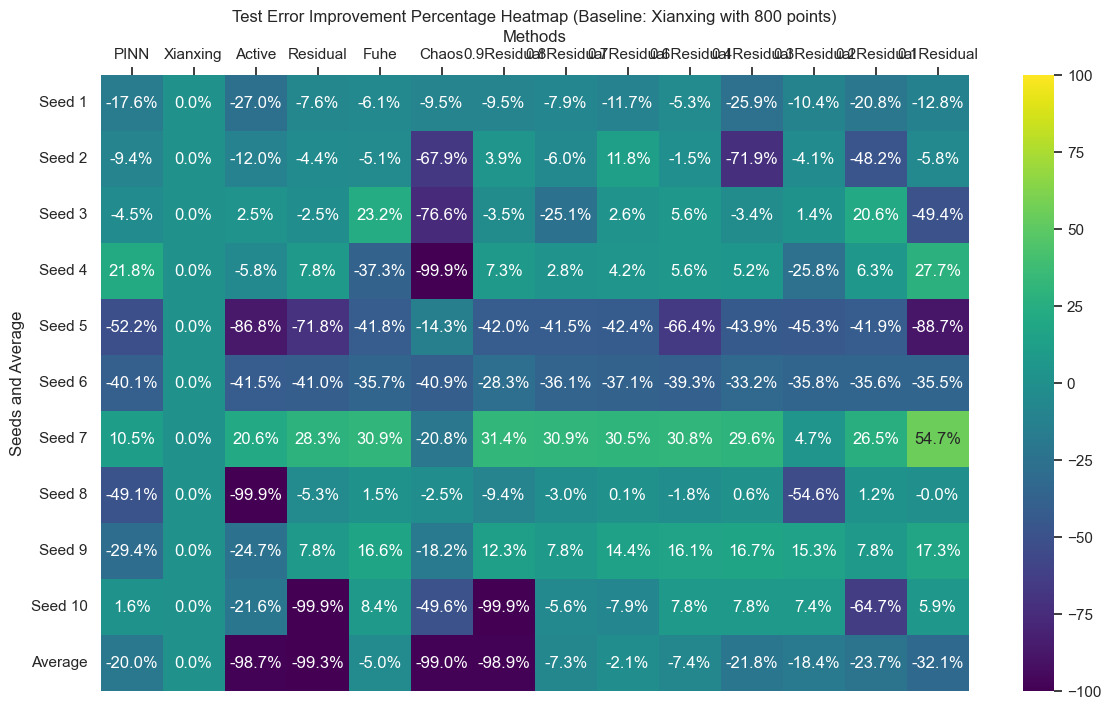

In [10]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



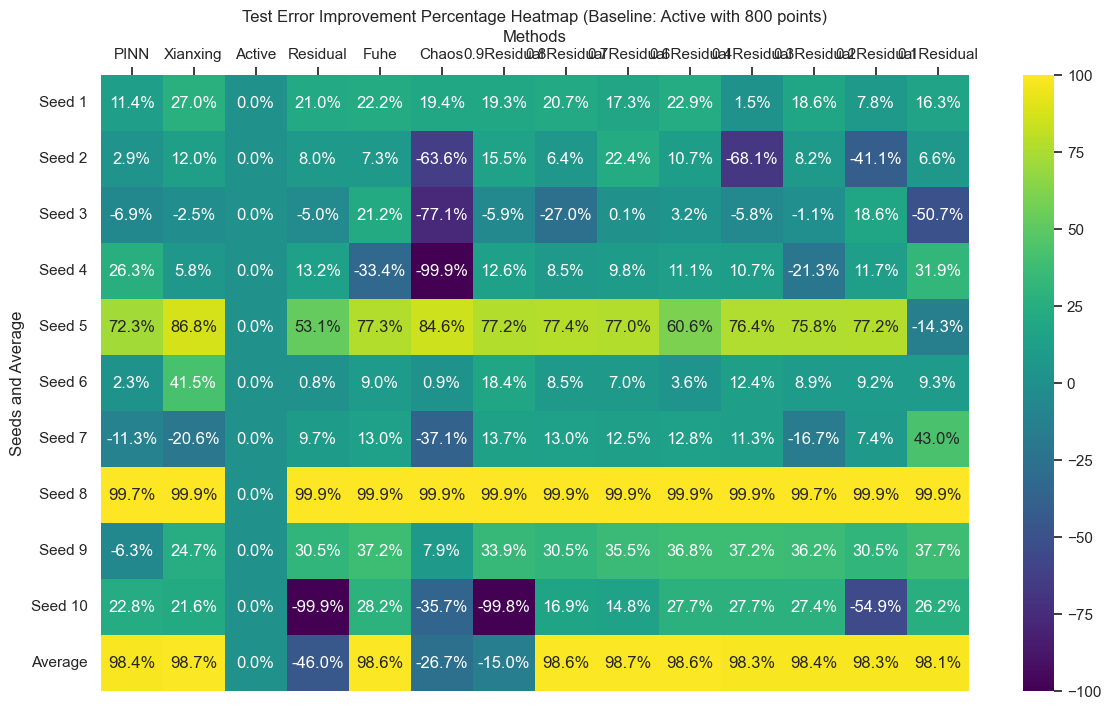

In [11]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



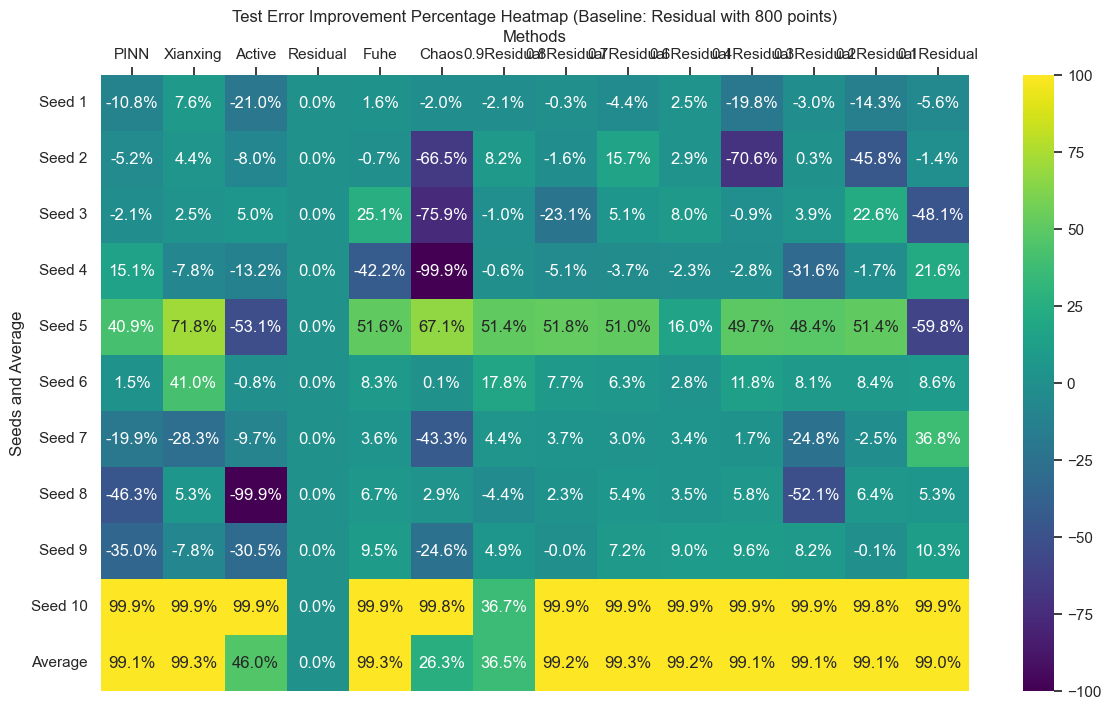

In [12]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



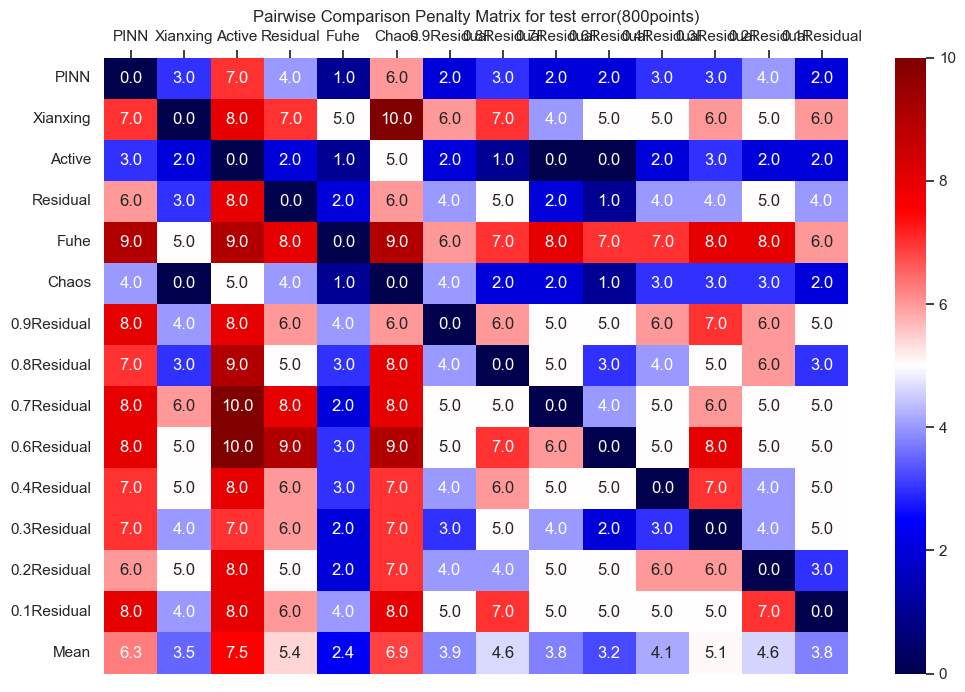

In [13]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [14]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Chaos', '0.9Residual', '0.8Residual', '0.7Residual', '0.6Residual', '0.4Residual', '0.3Residual', '0.2Residual', '0.1Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.00015397783070231113, 0.0001454873810307916, 0.0001548726465310479, 0.00012626243115483474, 0.00019635635649588497, 0.00015449652540876614, 0.0001842174007906868, 0.0002456482515296615, 0.0002340281849460364, 0.00014943499300139977], 'Xianxing': [0.00012815842466992893, 0.00013308757862589155, 0.00014891560207612047, 0.00015143549293169774, 9.134510216023825e-05, 0.00011564199864376177, 0.0002049880725818106, 0.00014231077883076462, 0.00016731465261219842, 0.00015251667525606835], 'Active': [0.00018516130868928007, 0.00015239831731062625, 0.00014283152582780407, 0.00016390754795242608, 0.0005215132734166209, 0.00016036564347222663, 0.00017179250399467942, 0.07688654768698683, 0.00025618642599234404, 0.0002191694478042031], 'Residual': [0.000134660486555496

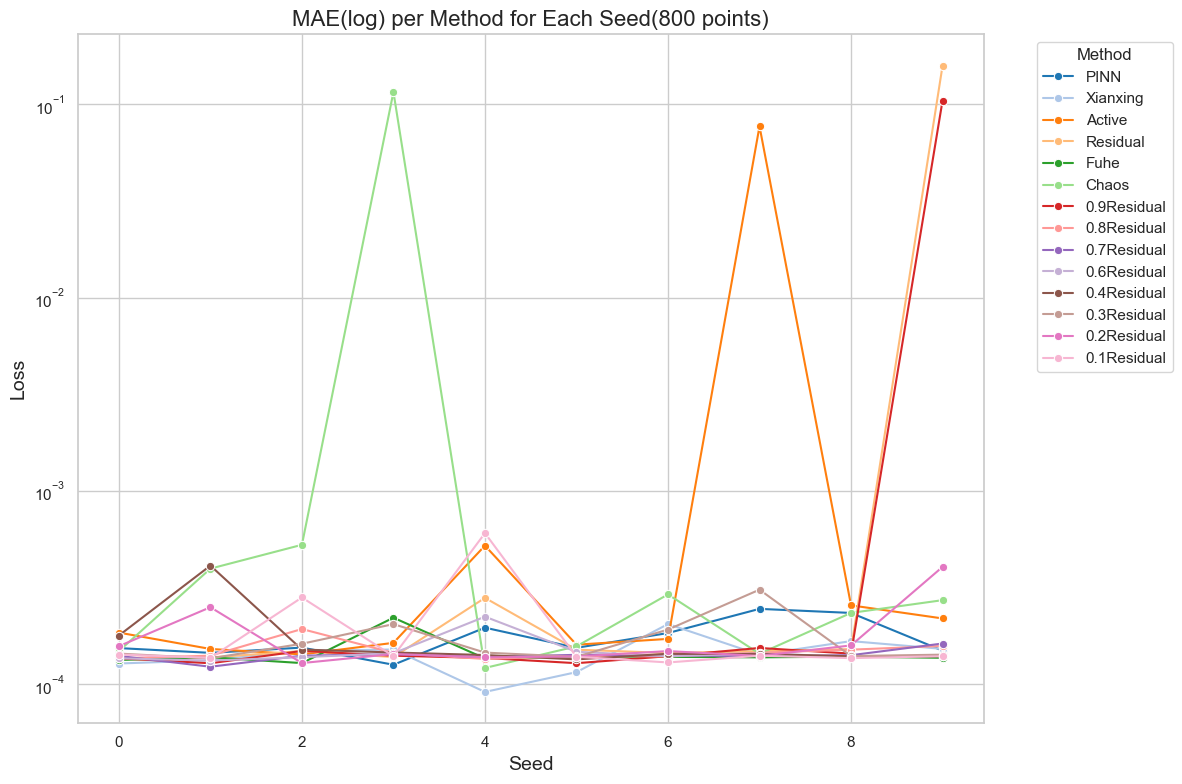

In [15]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

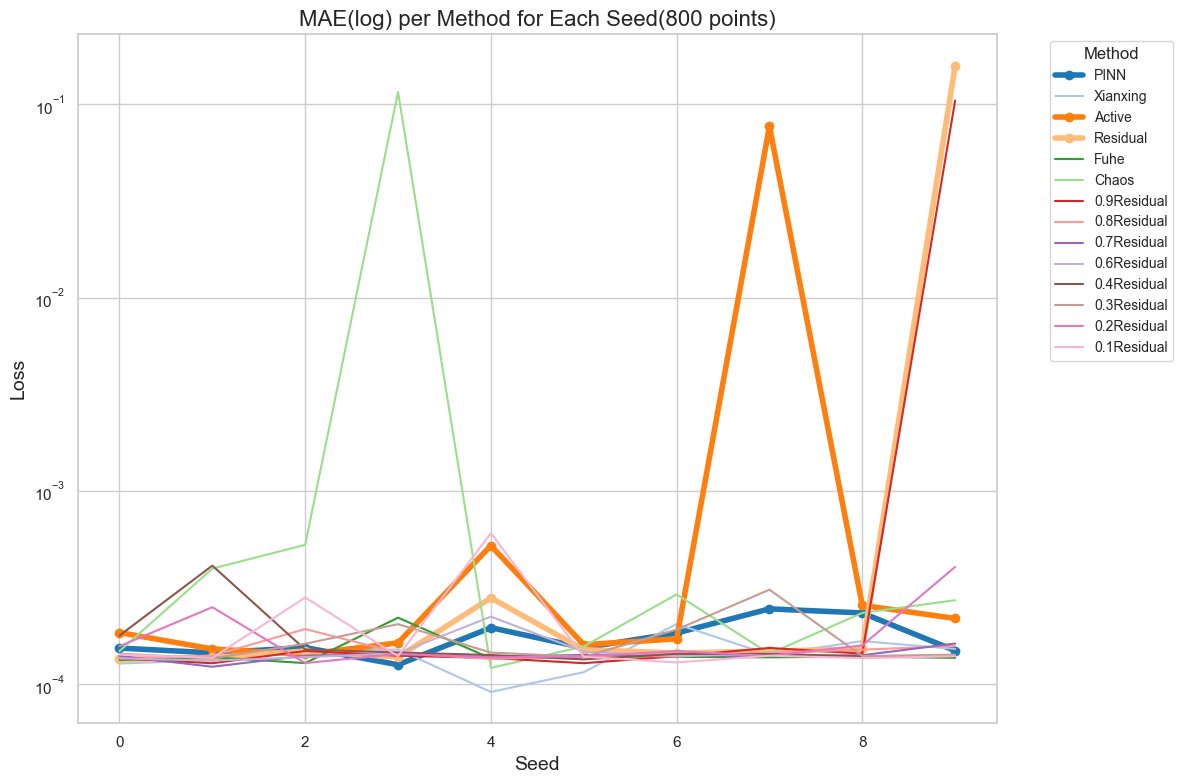

In [16]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\2169414111.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\2169414111.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


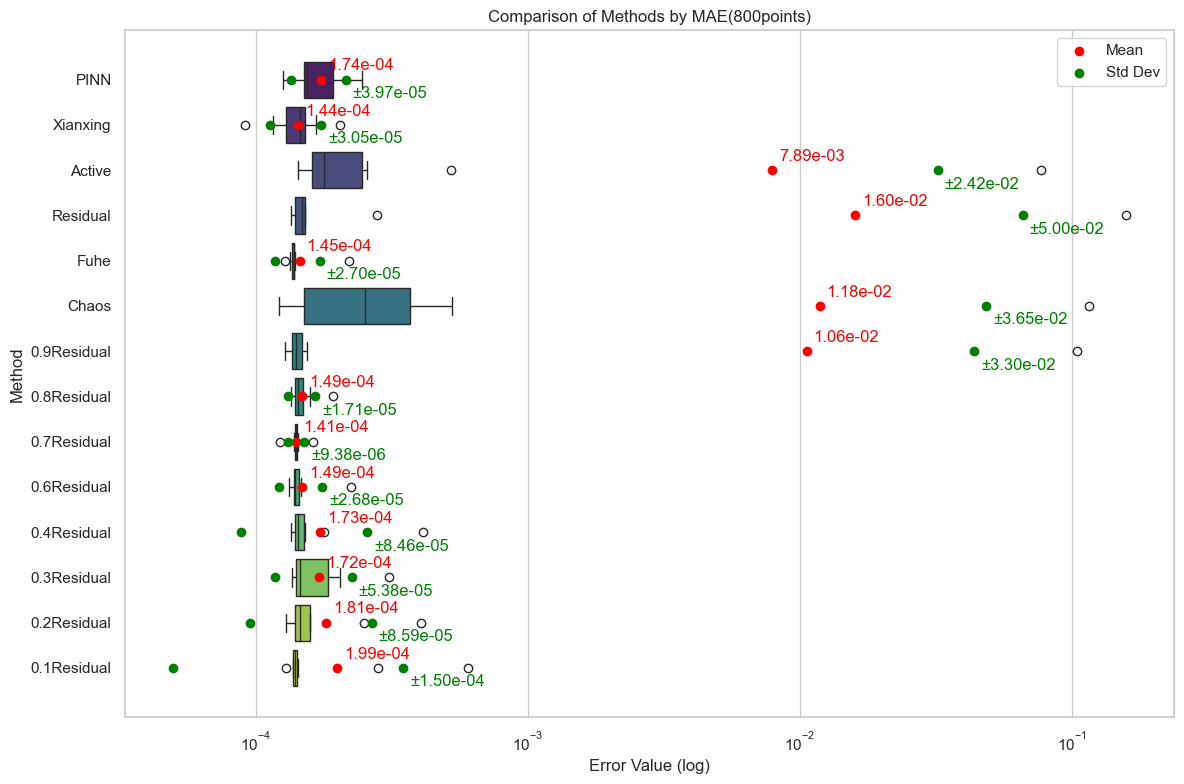

In [17]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\2556958130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


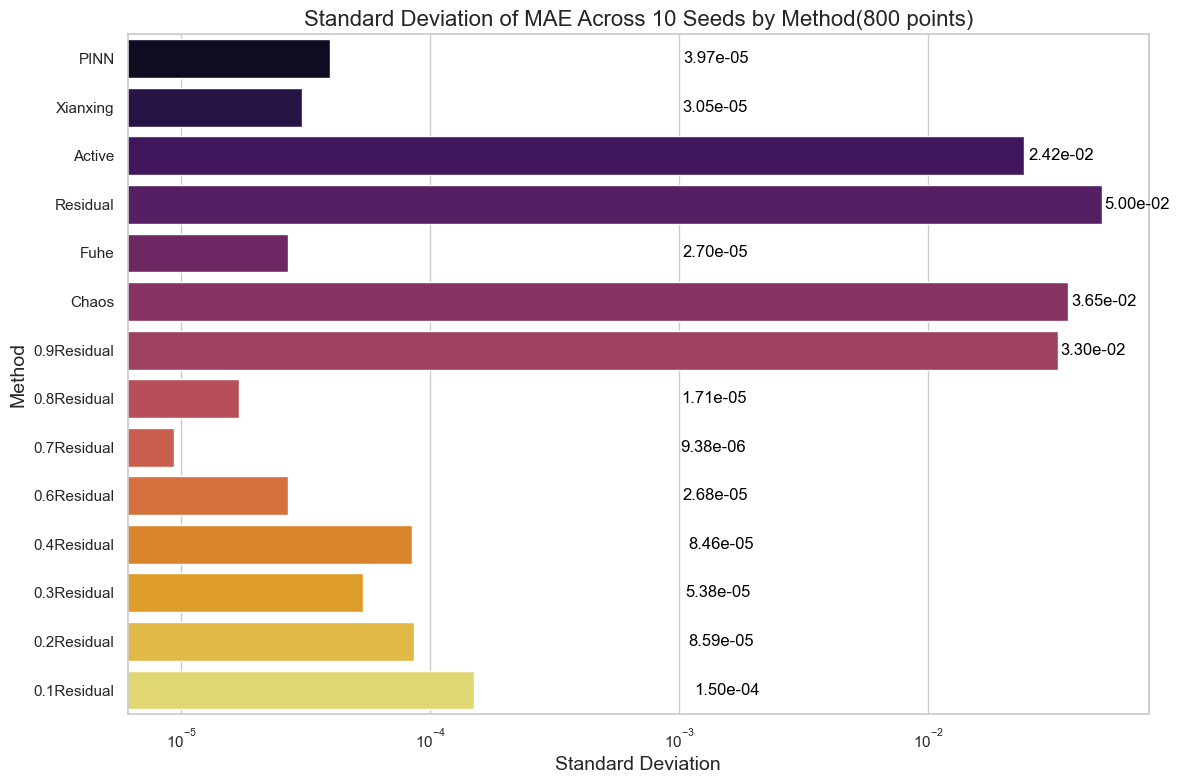

In [18]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

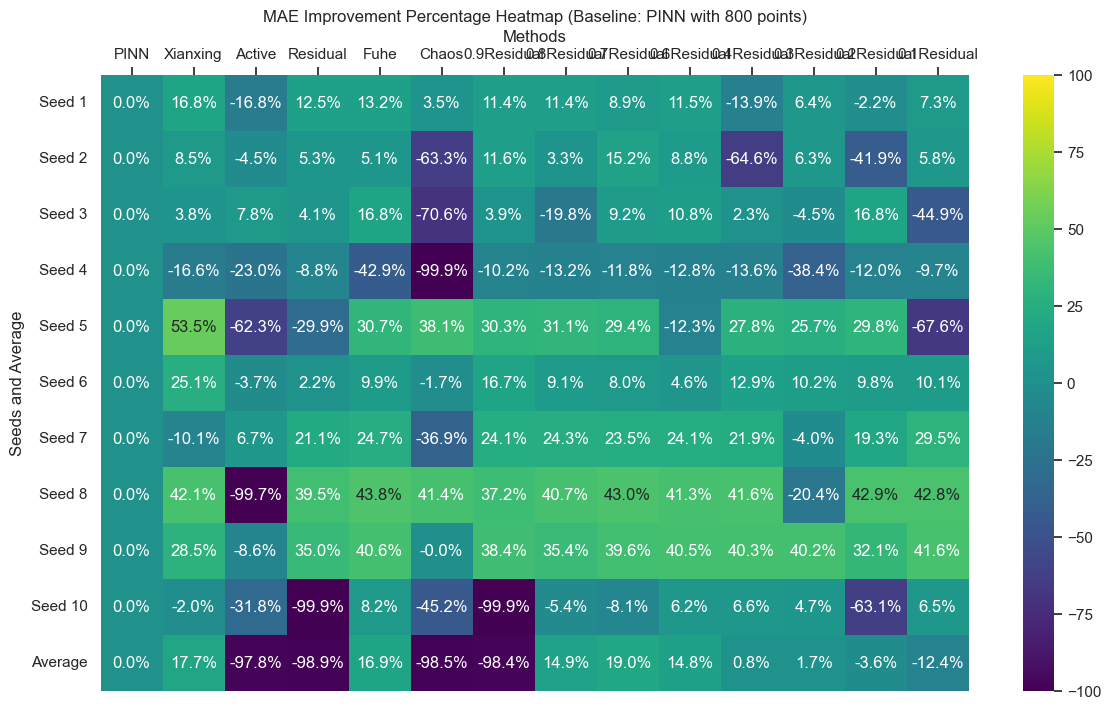

In [19]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



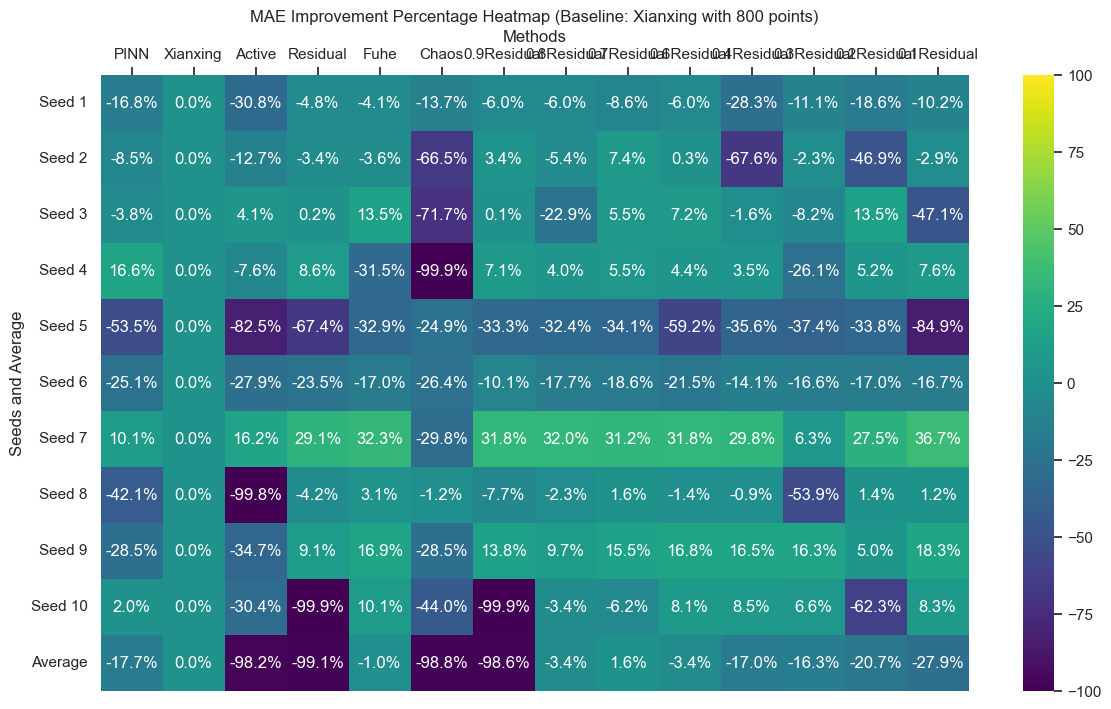

In [20]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



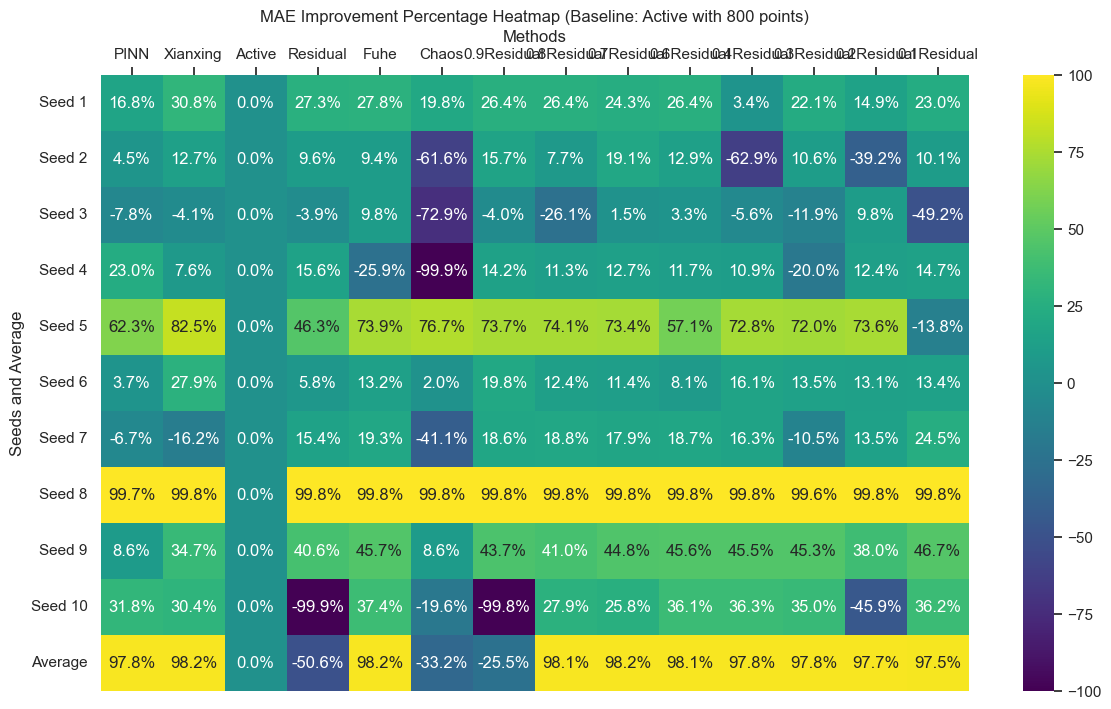

In [21]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



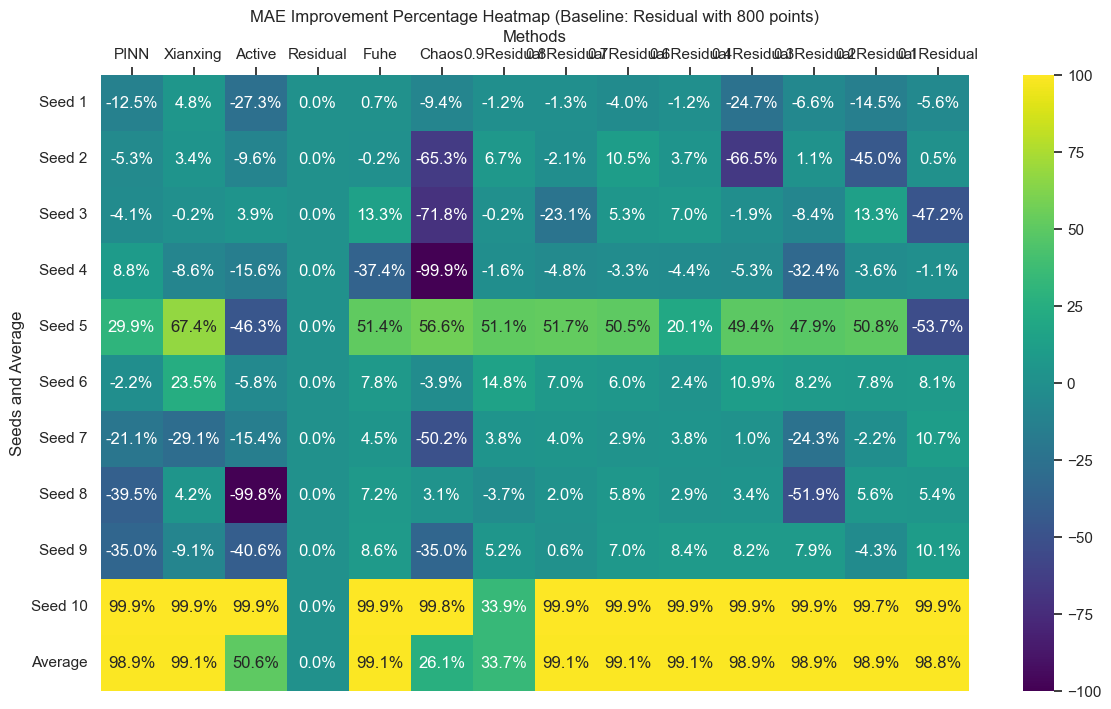

In [22]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



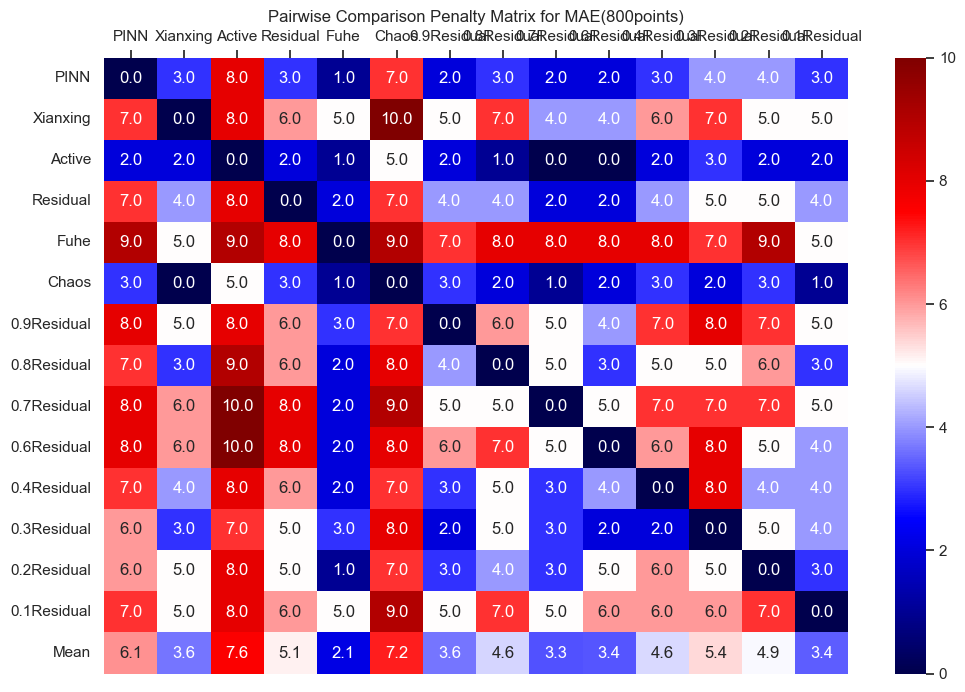

In [23]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [24]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Chaos', '0.9Residual', '0.8Residual', '0.7Residual', '0.6Residual', '0.4Residual', '0.3Residual', '0.2Residual', '0.1Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [5.02034790357667e-08, 4.692699759238895e-08, 5.196422300360493e-08, 3.6634415860281316e-08, 8.172389465962264e-08, 5.070185177060105e-08, 7.304977403304386e-08, 1.6983871256676875e-07, 1.2104198107510296e-07, 4.820312678060034e-08], 'Xianxing': [3.5149057388716755e-08, 3.8982447104249e-08, 4.7484307671771956e-08, 4.936517596175008e-08, 1.6979228956103354e-08, 2.6621524776512308e-08, 9.134920023338118e-08, 4.474192892706784e-08, 6.106671719925793e-08, 4.9794138011410646e-08], 'Active': [6.588629203382683e-08, 4.983859216945594e-08, 4.544956632807816e-08, 5.5827687329648876e-08, 7.772103421774413e-07, 5.354005337717293e-08, 5.871059239147882e-08, 0.02397774313168036, 1.2040161291692695e-07, 8.790442589443165e-08], 'Residual': [4.0661568759470776e-08, 4.2591598

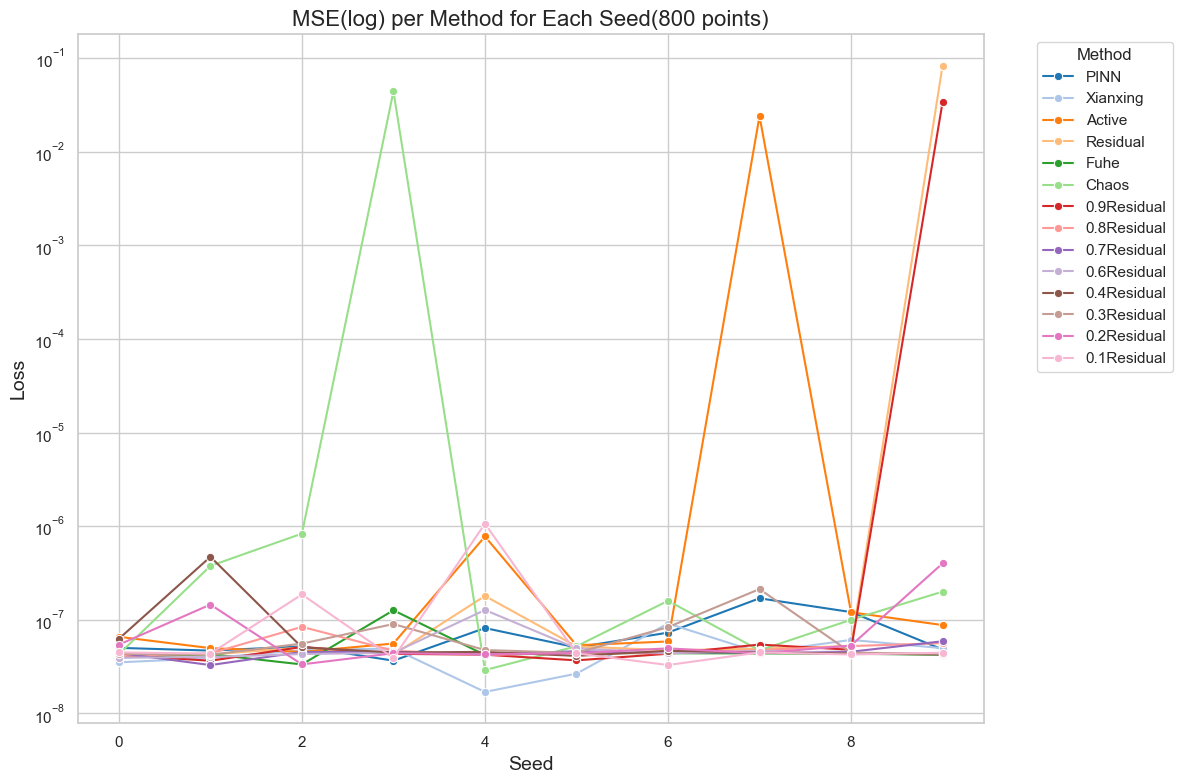

In [25]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

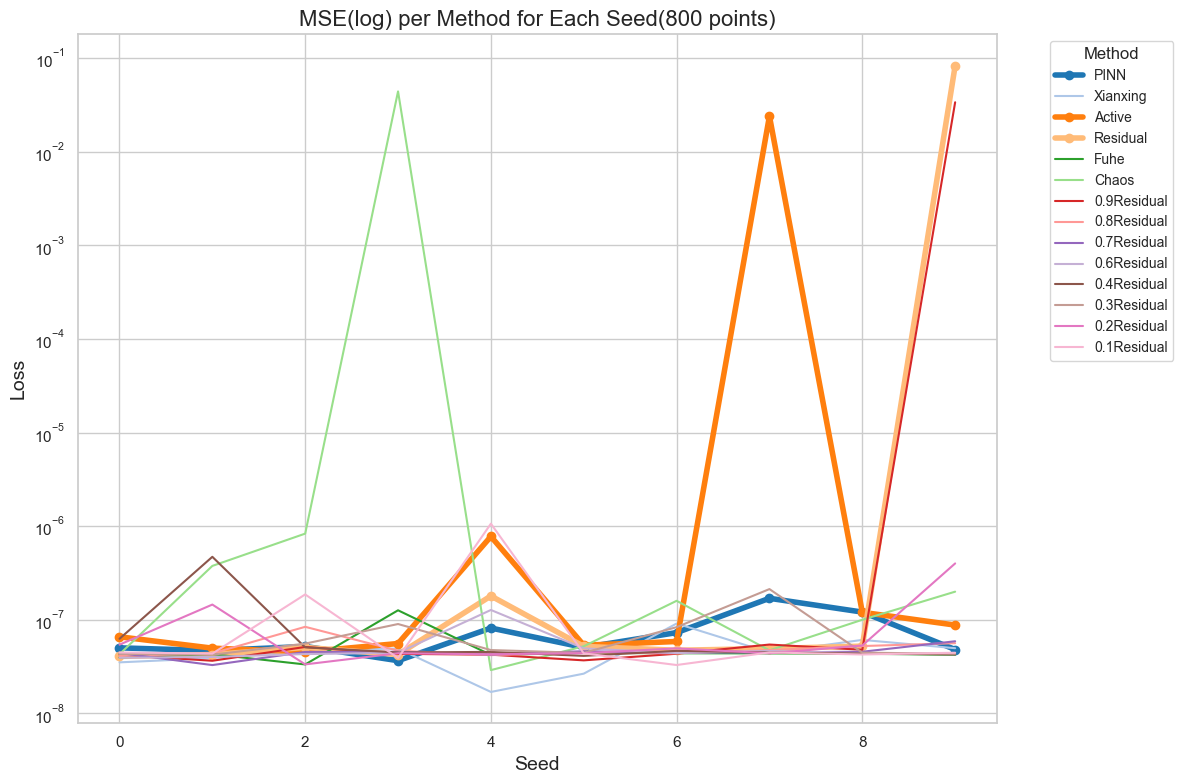

In [26]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\763428643.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_43508\763428643.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


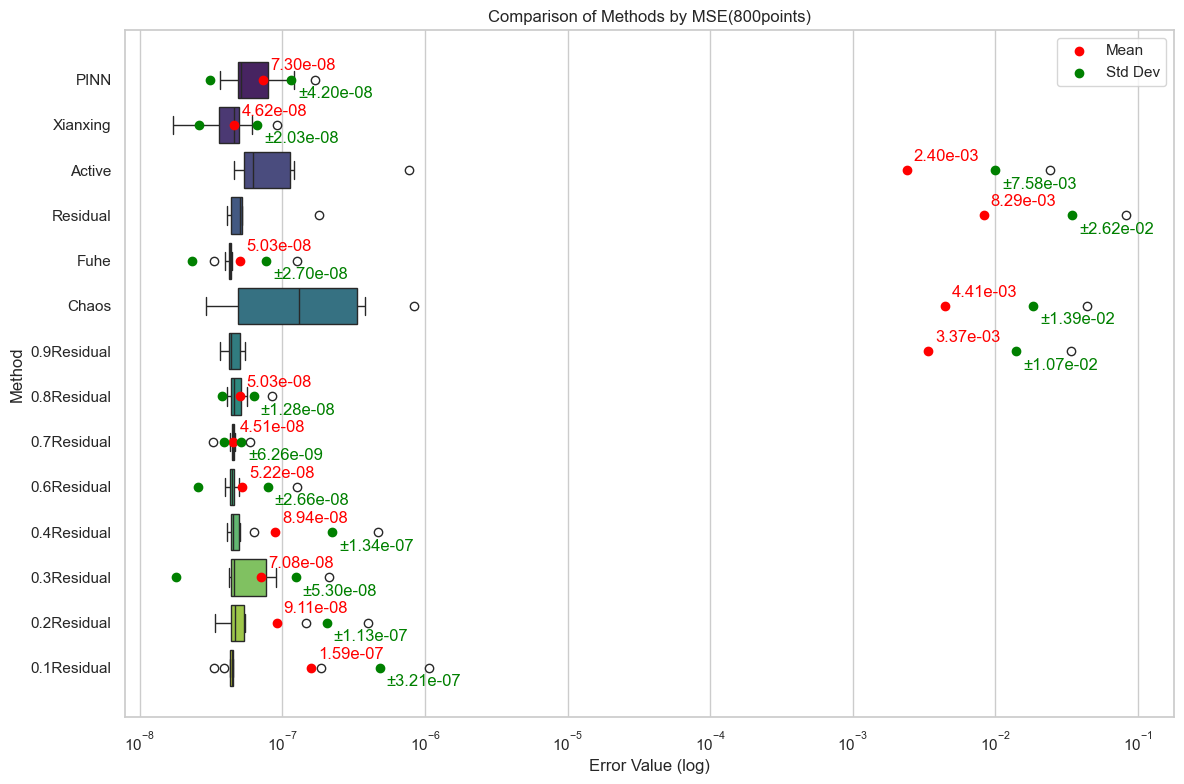

In [27]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

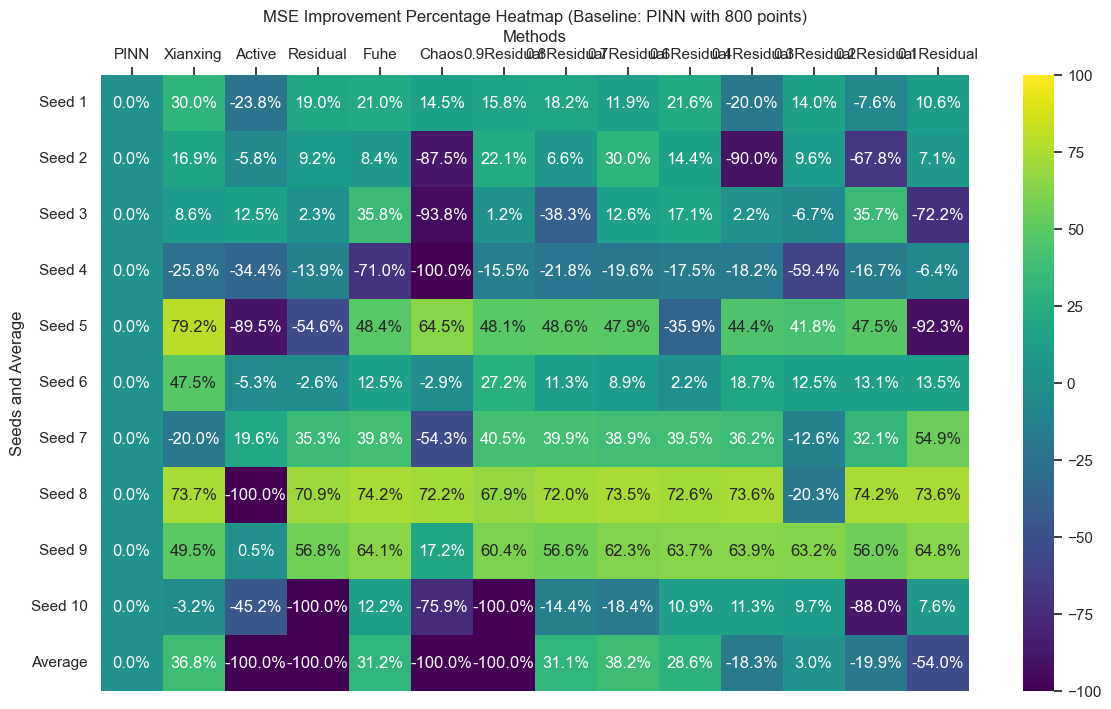

In [28]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



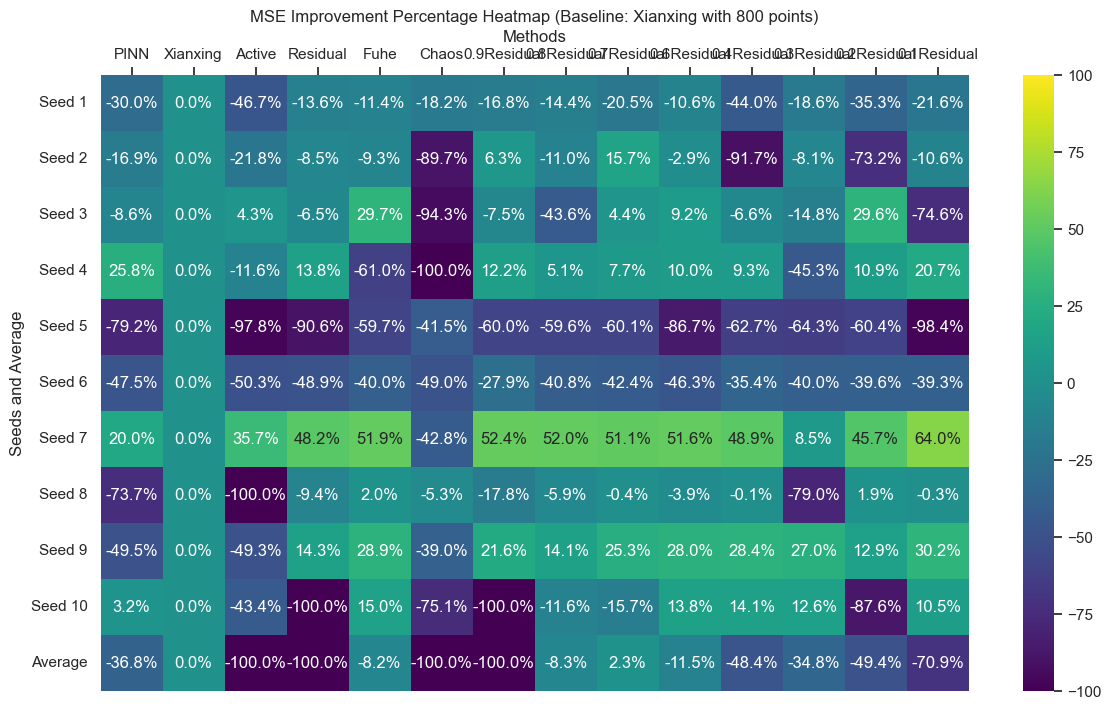

In [29]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



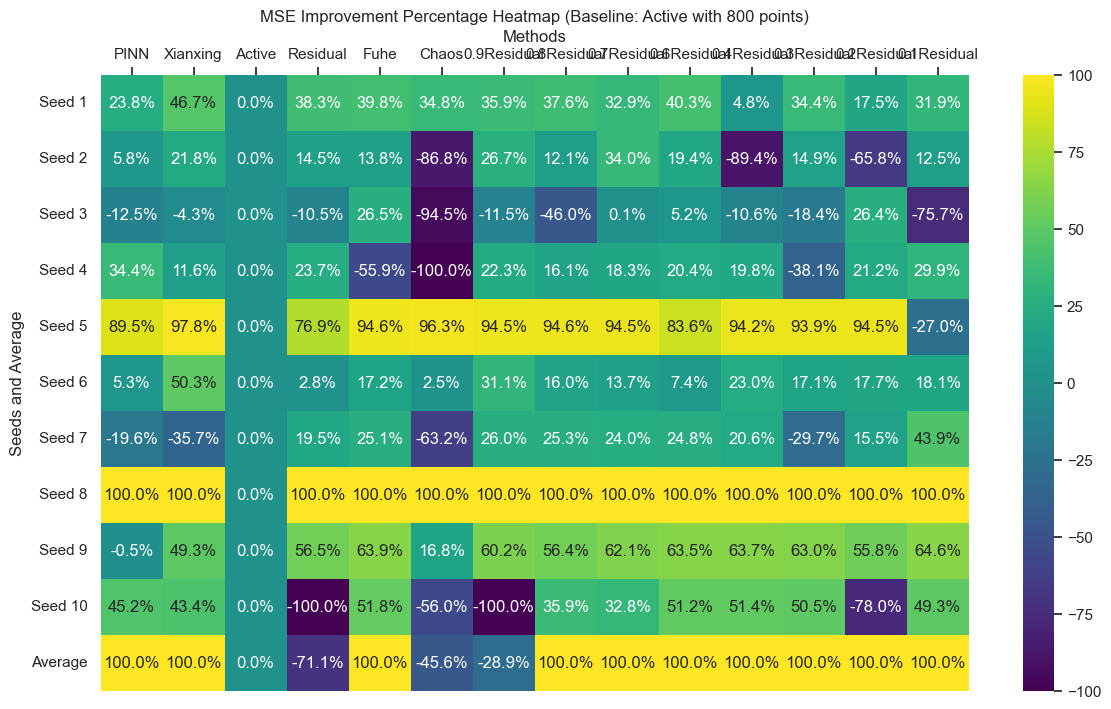

In [30]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



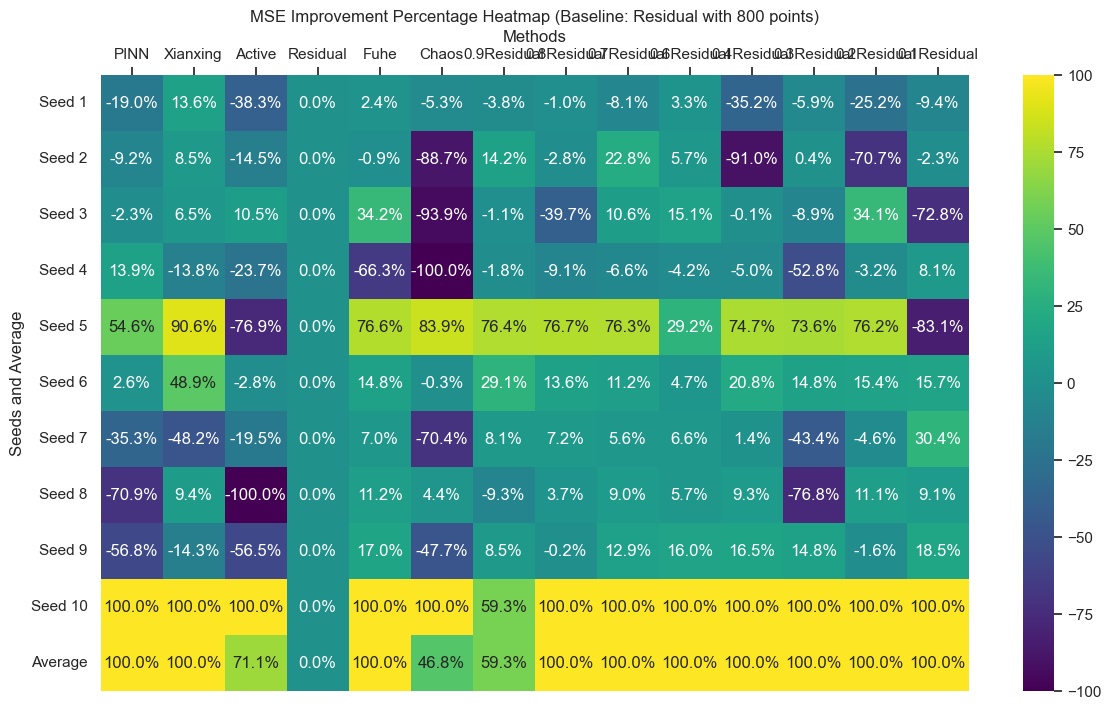

In [31]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



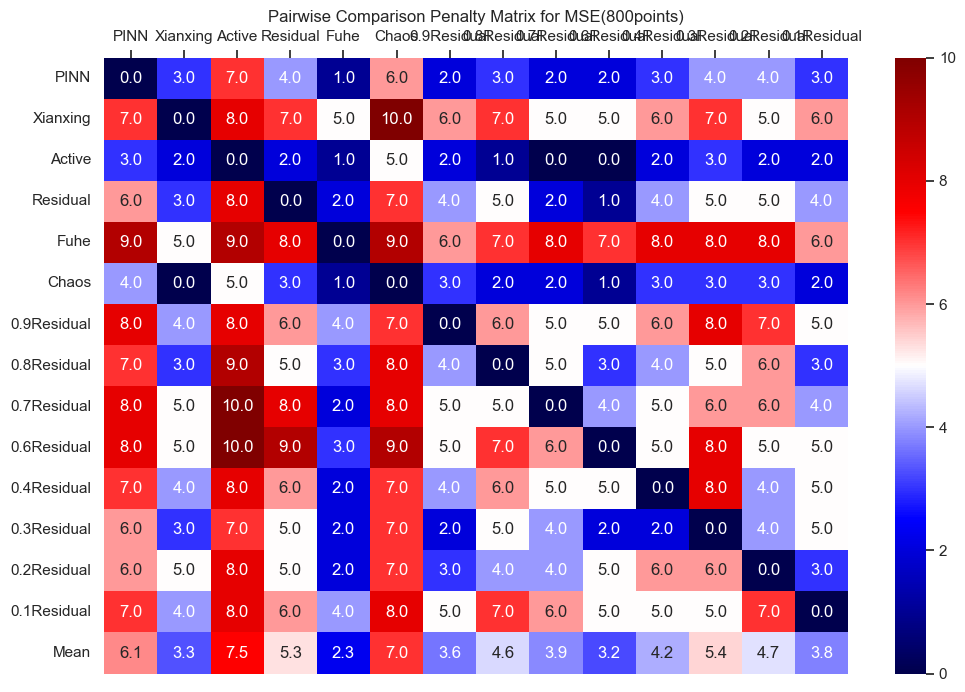

In [32]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [3]:
# 对每个 (Method, Metric) 分组，剔除最大值和最小值，计算均值和标准差
def compute_trimmed_stats(df):
    stats = {
        'Method': [],
        'Metric': [],
        'Mean (trimmed)': [],
        'Std (trimmed)': []
    }

    grouped = df.groupby(['Method', 'Metric'])

    for (method, metric), group in grouped:
        values = group['Values'].values[0]  # 取出列表
        if len(values) > 2:
            trimmed_values = sorted(values)[1:-1]  # 剔除最大值和最小值
        else:
            trimmed_values = values  # 不足三项无法剔除
        
        mean_val = sum(trimmed_values) / len(trimmed_values)
        std_val = pd.Series(trimmed_values).std()

        stats['Method'].append(method)
        stats['Metric'].append(metric)
        stats['Mean (trimmed)'].append(mean_val)
        stats['Std (trimmed)'].append(std_val)

    return pd.DataFrame(stats)

# 生成剔除极值后的统计结果表
trimmed_stats_df = compute_trimmed_stats(df)

# 打印结果
print(trimmed_stats_df)


         Method    Metric  Mean (trimmed)  Std (trimmed)
0   0.1Residual     Chaos    4.702320e-03   1.116344e-02
1   0.1Residual   Error_u    5.073719e-04   1.813036e-04
2   0.1Residual       MAE    1.571061e-04   5.022233e-05
3   0.1Residual       MSE    6.129202e-08   5.074752e-08
4   0.1Residual  Residual    4.612003e-07   2.218370e-08
..          ...       ...             ...            ...
65     Xianxing     Chaos    7.691805e-04   1.377356e-03
66     Xianxing   Error_u    4.501623e-04   7.496771e-05
67     Xianxing       MAE    1.424227e-04   1.626881e-05
68     Xianxing       MSE    4.415066e-08   1.049943e-08
69     Xianxing  Residual    4.688493e-07   5.477493e-08

[70 rows x 4 columns]


C:\Users\cheny\AppData\Local\Temp\ipykernel_8224\3874139176.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


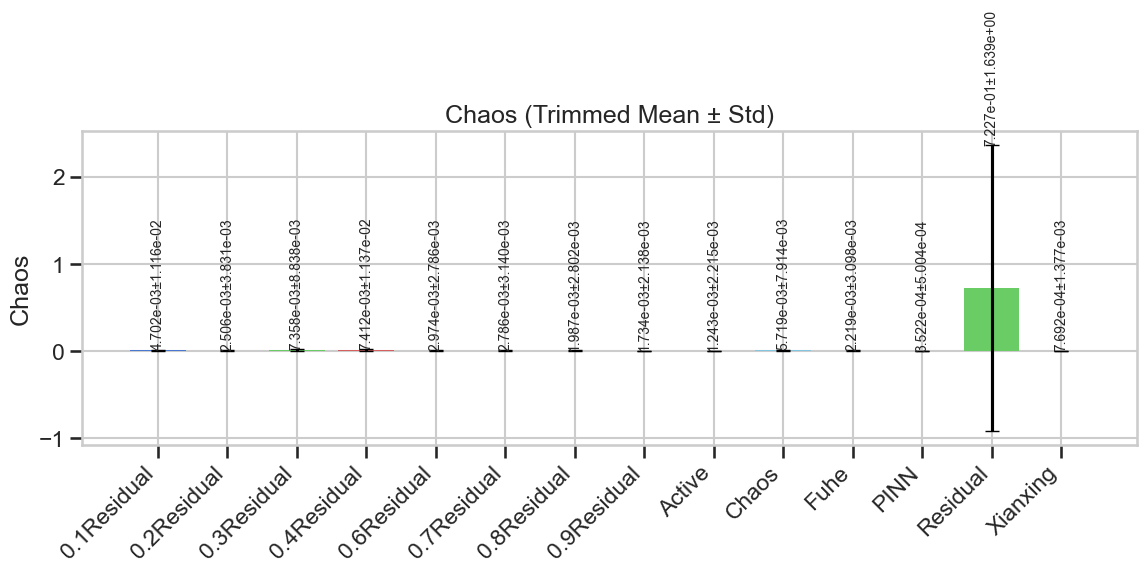

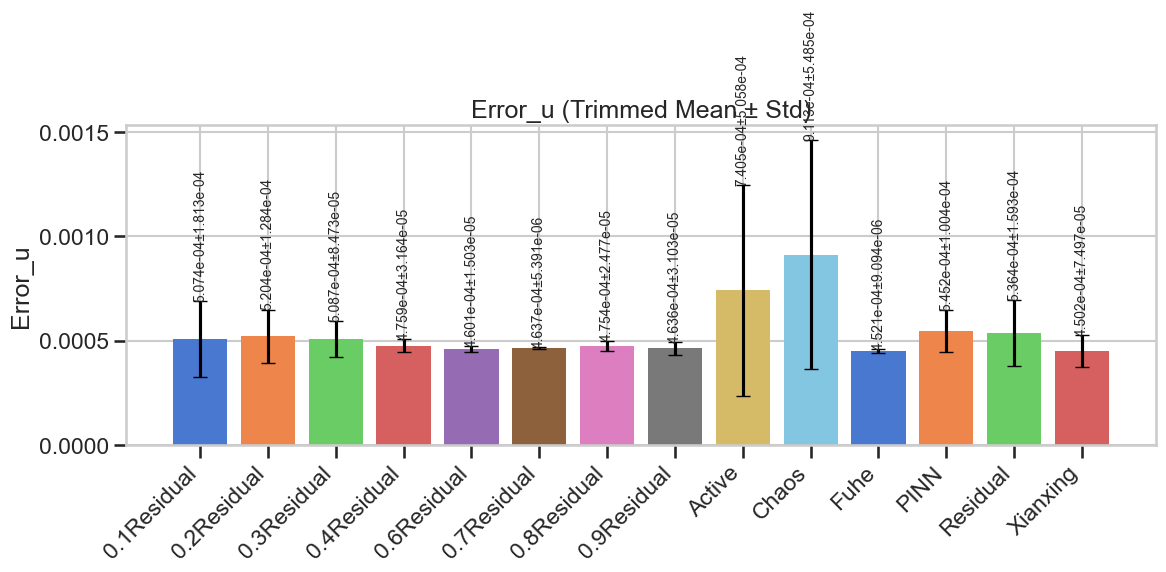

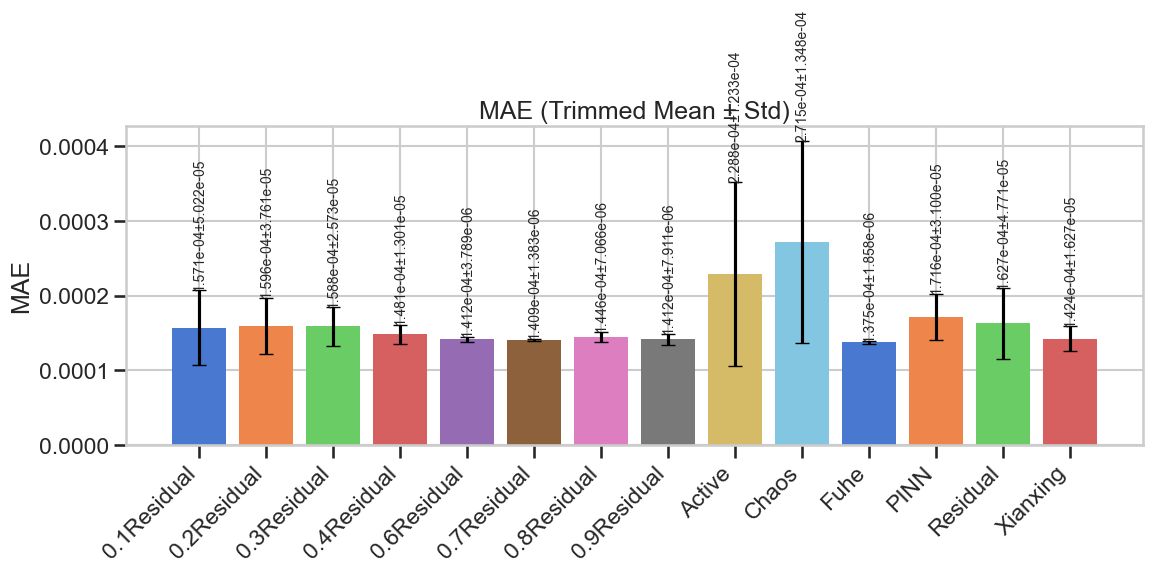

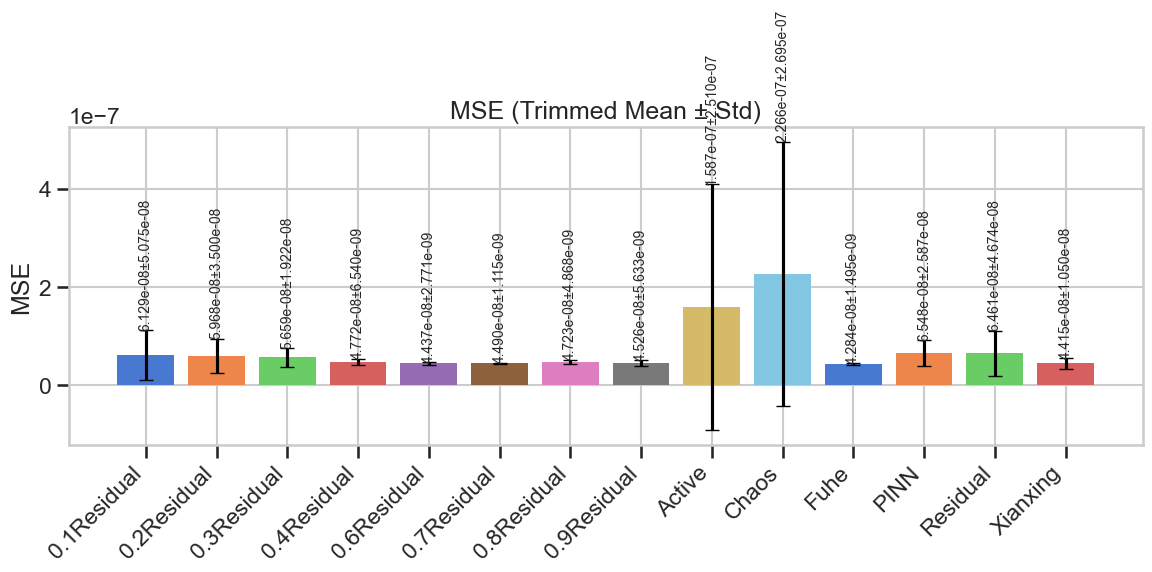

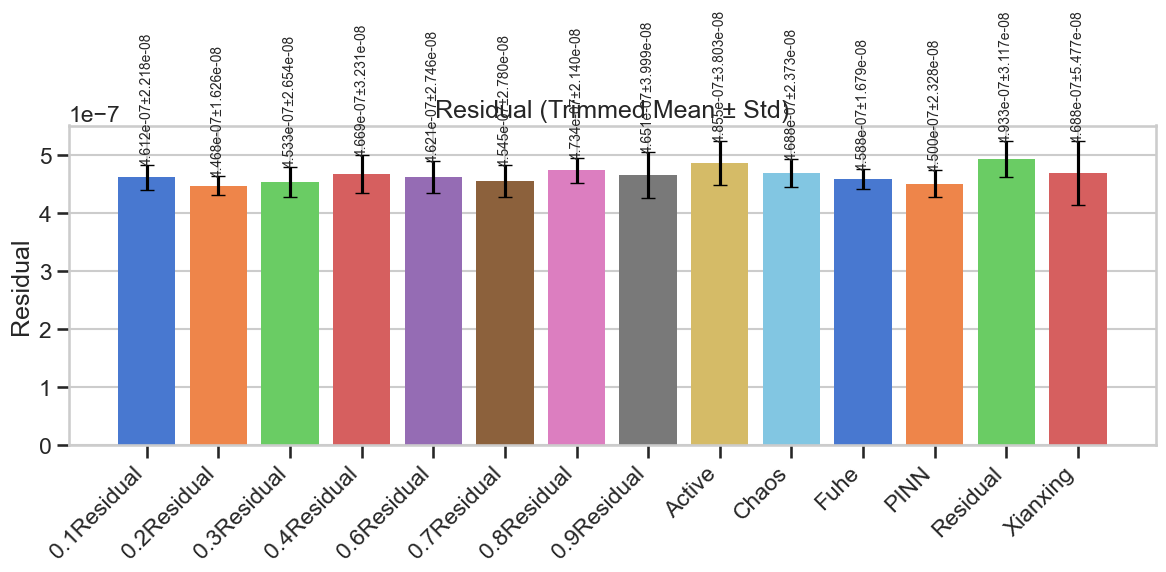

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置画图风格
plt.style.use("seaborn-whitegrid")
sns.set_context("talk")

# 遍历每个指标分别画图
metrics = trimmed_stats_df['Metric'].unique()

for metric in metrics:
    subset = trimmed_stats_df[trimmed_stats_df['Metric'] == metric]
    
    # 取数据
    methods = subset['Method'].values
    means = subset['Mean (trimmed)'].values
    stds = subset['Std (trimmed)'].values
    x = np.arange(len(methods))

    # 创建图和轴
    fig, ax = plt.subplots(figsize=(12, 6))

    # 画柱状图
    bars = ax.bar(x, means, yerr=stds, capsize=5, color=sns.color_palette("muted", len(methods)))

    # 添加数值标签
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + stds[i],  # 在误差条上方显示
            f'{means[i]:.3e}±{stds[i]:.3e}',  # 科学计数格式，比如 4.56e-04
            ha='center', va='bottom', fontsize=10, rotation=90
        )

    # 设置图表
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=45, ha='right')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} (Trimmed Mean ± Std)')
    plt.tight_layout()
    plt.show()
